<a href="https://colab.research.google.com/github/MonteiroAlvesMatheus/TCC/blob/main/Cria%C3%A7%C3%A3o_dos_Dataframes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuração Computador Colab

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs mmio_stale_data retbleed
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtua

In [ ]:
!nvidia-smi

Wed Jul 26 12:20:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Bibliotecas

In [ ]:
# instalando o a biblioteca pydicom
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 4.6 MB/s eta 0:00:00


In [ ]:
#importando as bibliotecas
import pandas as pd
import os
import numpy as np
import random
import pydicom
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import subprocess
from PIL import Image
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from tensorflow.keras.metrics import CategoricalAccuracy, AUC, Precision, Recall
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, precision_score, recall_score

In [ ]:
!python -V

Python 3.10.12


In [ ]:
!pip show tensorflow
!pip show keras
!pip show matplotlib
!pip show seaborn
!pip show numpy
!pip show pandas


Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, jax, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl
Name: keras
Version: 2.12.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow
Name: matplotlib
Version: 3.7.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python

In [ ]:
print(sklearn.__version__)
print(cv2.__version__)

1.2.2
4.7.0


In [ ]:
gpu_available = tf.config.list_physical_devices('GPU')

if len(gpu_available) > 0:
    print('GPU disponível')
    gpu_info = tf.config.list_physical_devices('GPU')
    print(gpu_info)
else:
    print('Nenhuma GPU disponível')

GPU disponível
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Conjunto de Dados

https://www.cardiacatlas.org/sunnybrook-cardiac-data/


## Baixando e Descompactando o Conjunto de Dados

In [ ]:
#baixando o banco de dados
!wget --no-check-certificate -O ds-parte1.zip 'https://www.cardiacatlas.org/share/download.php?id=89&token=z8AjLvYk8PxbVzfoPzxGuy7AupIoD2PY&download' #19 casos
!wget --no-check-certificate -O ds-parte2.zip 'https://www.cardiacatlas.org/share/download.php?id=90&token=2HmYTa1kwKKLRLk6vFhfQg43fideQ2Ba&download'  #26 casos
!wget --no-check-certificate -O dadopaciente.csv 'https://www.cardiacatlas.org/share/download.php?id=66&token=Y1D66ieUdbXFlqmZ4icHJheJy44MXUPY&download'  #rótulo do banco de dados

--2023-08-09 22:55:46--  https://www.cardiacatlas.org/share/download.php?id=89&token=z8AjLvYk8PxbVzfoPzxGuy7AupIoD2PY&download
Resolving www.cardiacatlas.org (www.cardiacatlas.org)... 193.61.200.23
Connecting to www.cardiacatlas.org (www.cardiacatlas.org)|193.61.200.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1279619936 (1.2G) [application/octet-stream]
Saving to: ‘ds-parte1.zip’

ds-parte1.zip        84%[===============>    ]   1.00G   603KB/s    in 43m 41s 

2023-08-09 23:39:28 (402 KB/s) - Connection closed at byte 1079733760. Retrying.

--2023-08-09 23:39:29--  (try: 2)  https://www.cardiacatlas.org/share/download.php?id=89&token=z8AjLvYk8PxbVzfoPzxGuy7AupIoD2PY&download
Connecting to www.cardiacatlas.org (www.cardiacatlas.org)|193.61.200.23|:443... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 1279619936 (1.2G), 199886176 (191M) remaining [application/octet-stream]
Saving to: ‘ds-parte1.zip’

ds-parte1.zip       100

In [ ]:
#descompactando o banco de dados
!unzip "ds-parte1.zip"
!unzip "ds-parte2.zip"

A saída de streaming foi truncada nas últimas 5000 linhas.
   creating: SCD0004201/3.276_2YMAJdAczcjAfXpHFLC6Zj453OlBWiLWSRfwuO3ZLEpPqrg3VQX9CQFKPIdx8Vg6I_+x_-x_256_256_-38/
  inflating: SCD0004201/3.276_2YMAJdAczcjAfXpHFLC6Zj453OlBWiLWSRfwuO3ZLEpPqrg3VQX9CQFKPIdx8Vg6I_+x_-x_256_256_-38/CAP_SCD0004201_MR__hrt_raw_20120813124049187_3.dcm  
  inflating: SCD0004201/3.276_2YMAJdAczcjAfXpHFLC6Zj453OlBWiLWSRfwuO3ZLEpPqrg3VQX9CQFKPIdx8Vg6I_+x_-x_256_256_-38/SCD0004201.log  
   creating: SCD0004201/3.276_2YMAJdAczcjAfXpHFLC6Zj453OlBWiLWSRfwuO3ZLEpPqrg3VQX9CQFKPIdx8Vg6I_+x_-x_256_256_-44/
  inflating: SCD0004201/3.276_2YMAJdAczcjAfXpHFLC6Zj453OlBWiLWSRfwuO3ZLEpPqrg3VQX9CQFKPIdx8Vg6I_+x_-x_256_256_-44/CAP_SCD0004201_MR__hrt_raw_20120813124049210_4.dcm  
  inflating: SCD0004201/3.276_2YMAJdAczcjAfXpHFLC6Zj453OlBWiLWSRfwuO3ZLEpPqrg3VQX9CQFKPIdx8Vg6I_+x_-x_256_256_-44/SCD0004201.log  
   creating: SCD0004201/3.276_2YMAJdAczcjAfXpHFLC6Zj453OlBWiLWSRfwuO3ZLEpPqrg3VQX9CQFKPIdx8Vg6I_+x_-x_256_256_-51/


## Pré-Processamento do Conjunto de Dados

In [ ]:
#criando o diretorio do dataset de acordo com as classes de doenças
dataset_path1='treino'

!mkdir -p {dataset_path1}/Infarto
!mkdir -p {dataset_path1}/Insuficiencia
!mkdir -p {dataset_path1}/Hipertrofia
!mkdir -p {dataset_path1}/Normal

dataset_path2='teste'

!mkdir -p {dataset_path2}/Infarto
!mkdir -p {dataset_path2}/Insuficiencia
!mkdir -p {dataset_path2}/Hipertrofia
!mkdir -p {dataset_path2}/Normal

dataset_path3='validacao'

!mkdir -p {dataset_path3}/Infarto
!mkdir -p {dataset_path3}/Insuficiencia
!mkdir -p {dataset_path3}/Hipertrofia
!mkdir -p {dataset_path3}/Normal


categorias=os.listdir(dataset_path1)
print(categorias)

['Infarto', 'Normal', 'Insuficiencia', 'Hipertrofia']


In [ ]:
datapath1='/content'


#lendo o arquivo de dados dos pacientes
dataset=pd.read_csv(os.path.join(datapath1,'dadopaciente.csv'))
#localizando os pacientes de acordo com sua respectiva doença
pacientes=dataset['PatientID']
doencas = dataset['Pathology']
dataset


,PatientID,OriginalID,Gender,Age,Pathology
0,SCD0000101,SC-HF-I-1,Male,53,Heart failure with infarct
1,SCD0000201,SC-HF-I-2,Male,48,Heart failure with infarct
2,SCD0000301,SC-HF-I-4,Male,79,Heart failure with infarct
3,SCD0000401,SC-HF-I-5,Male,45,Heart failure with infarct
4,SCD0000501,SC-HF-I-6,Male,60,Heart failure with infarct
5,SCD0000601,SC-HF-I-7,Male,74,Heart failure with infarct
6,SCD0000701,SC-HF-I-8,Male,46,Heart failure with infarct
7,SCD0000801,SC-HF-I-9,Male,57,Heart failure with infarct
8,SCD0000901,SC-HF-I-10,Male,69,Heart failure with infarct
9,SCD0001001,SC-HF-I-11,Male,55,Heart failure with infarct


In [ ]:
pacientes.count()

45

In [ ]:
type(pacientes)

pandas.core.series.Series

In [ ]:
doencas.unique()

array(['Heart failure with infarct', 'Heart failure without infarct',
       'Hypertrophy', 'Normal'], dtype=object)

<Axes: >

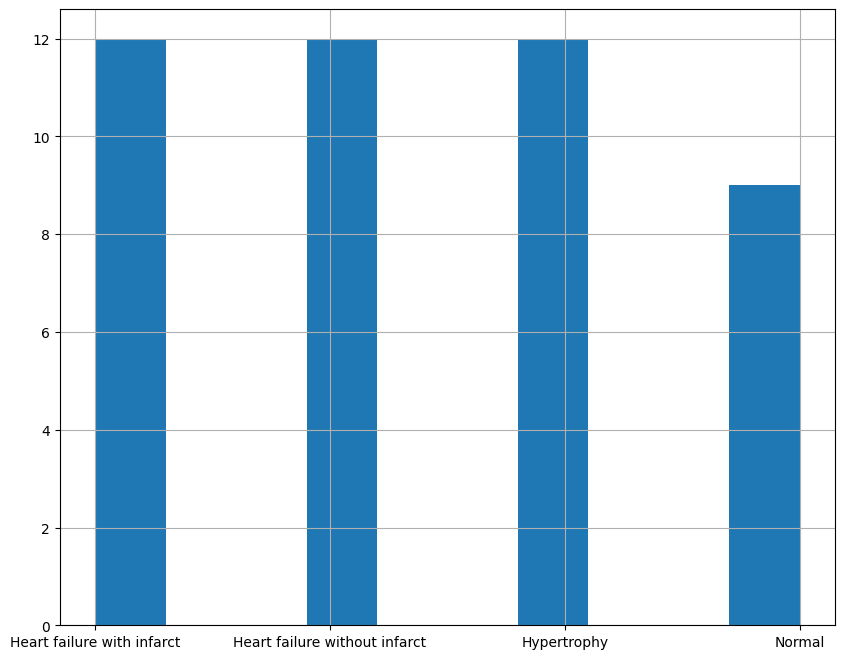

In [ ]:
doencas.hist(figsize = (10,8))

In [ ]:
infarto_index = np.where(doencas == 'Heart failure with infarct')[0] #localizando o endereço dos pacientes infartados dentro da lista
insuficiencia_index = np.where (doencas == 'Heart failure without infarct')[0] #localizando o endereço dos pacientes insuficientes dentro da lista
hipertrofia_index = np.where (doencas == 'Hypertrophy')[0] #localizando o endereço dos pacientes com hipertrofia dentro da lista
normal_index = np.where (doencas == 'Normal')[0] #localizando o endereço dos pacientes normais dentro da lista

In [ ]:
#Colunas Dataframe
caminhoimg = []
nomeimg = []
tamanhoimg = []
orientacaoimg = []
classe = []
idpaciente = []

In [ ]:
#Separação dos dados de acordo com a dimensão e orientação da imagens e indexado aos vetores correspondentes as colunas do dataframe.

for infartados in pacientes[infarto_index]:
  pacientes_infartados = os.listdir(os.path.join(datapath1,infartados))
  for img_infarto in pacientes_infartados:
    if "512_512" in img_infarto:
      img_pacientes_inf = os.listdir(os.path.join(datapath1,infartados,img_infarto))
      renome_img = !echo {img_infarto} | sed 's/-z/;-z;/g' | sed 's/+x/;+x;/g' | sed 's/-x/;-x;/g' | sed 's/-y/;-y;/g' | sed 's/+y/;+y;/g' | sed 's/+z/;+z;/g'
      for nome_arquivo_inf in img_pacientes_inf:
        if nome_arquivo_inf.endswith(".dcm"):
          endereco_arquivo_inf = os.path.join(datapath1,infartados,img_infarto,nome_arquivo_inf)
          awk_command = "awk -F';' '{print $2$4}'"
          orient=subprocess.check_output(f"echo {renome_img} |  {awk_command}", shell=True)
          orient2 = orient.decode("utf-8").strip()
          shape = '512x512'
          cls = 'Infarto'
          idpaciente.append(infartados)
          orientacaoimg.append(orient2)
          caminhoimg.append(endereco_arquivo_inf)
          nomeimg.append(nome_arquivo_inf)
          tamanhoimg.append(shape)
          classe.append(cls)
    if "256_256" in img_infarto:
      img_pacientes_inf = os.listdir(os.path.join(datapath1,infartados,img_infarto))
      renome_img = !echo {img_infarto} | sed 's/-z/;-z;/g' | sed 's/+x/;+x;/g' | sed 's/-x/;-x;/g' | sed 's/-y/;-y;/g' | sed 's/+y/;+y;/g' | sed 's/+z/;+z;/g'
      for nome_arquivo_inf in img_pacientes_inf:
        if nome_arquivo_inf.endswith(".dcm"):
          endereco_arquivo_inf = os.path.join(datapath1,infartados,img_infarto,nome_arquivo_inf)
          awk_command = "awk -F';' '{print $2$4}'"
          orient=subprocess.check_output(f"echo {renome_img} |  {awk_command}", shell=True)
          orient2 = orient.decode("utf-8").strip()
          shape = '256x256'
          cls = 'Infarto'
          idpaciente.append(infartados)
          orientacaoimg.append(orient2)
          caminhoimg.append(endereco_arquivo_inf)
          nomeimg.append(nome_arquivo_inf)
          tamanhoimg.append(shape)
          classe.append(cls)
    if "128_128" in img_infarto:
      img_pacientes_inf = os.listdir(os.path.join(datapath1,infartados,img_infarto))
      renome_img = !echo {img_infarto} | sed 's/-z/;-z;/g' | sed 's/+x/;+x;/g' | sed 's/-x/;-x;/g' | sed 's/-y/;-y;/g' | sed 's/+y/;+y;/g' | sed 's/+z/;+z;/g'
      for nome_arquivo_inf in img_pacientes_inf:
        if nome_arquivo_inf.endswith(".dcm"):
          endereco_arquivo_inf = os.path.join(datapath1,infartados,img_infarto,nome_arquivo_inf)
          awk_command = "awk -F';' '{print $2$4}'"
          orient=subprocess.check_output(f"echo {renome_img} |  {awk_command}", shell=True)
          orient2 = orient.decode("utf-8").strip()
          shape = '128x128'
          cls = 'Infarto'
          idpaciente.append(infartados)
          orientacaoimg.append(orient2)
          caminhoimg.append(endereco_arquivo_inf)
          nomeimg.append(nome_arquivo_inf)
          tamanhoimg.append(shape)
          classe.append(cls)
    if "64_64" in img_infarto:
      img_pacientes_inf = os.listdir(os.path.join(datapath1,infartados,img_infarto))
      renome_img = !echo {img_infarto} | sed 's/-z/;-z;/g' | sed 's/+x/;+x;/g' | sed 's/-x/;-x;/g' | sed 's/-y/;-y;/g' | sed 's/+y/;+y;/g' | sed 's/+z/;+z;/g'
      for nome_arquivo_inf in img_pacientes_inf:
        if nome_arquivo_inf.endswith(".dcm"):
          endereco_arquivo_inf = os.path.join(datapath1,infartados,img_infarto,nome_arquivo_inf)
          awk_command = "awk -F';' '{print $2$4}'"
          orient=subprocess.check_output(f"echo {renome_img} |  {awk_command}", shell=True)
          orient2 = orient.decode("utf-8").strip()
          shape = '64x64'
          cls = 'Infarto'
          idpaciente.append(infartados)
          orientacaoimg.append(orient2)
          caminhoimg.append(endereco_arquivo_inf)
          nomeimg.append(nome_arquivo_inf)
          tamanhoimg.append(shape)
          classe.append(cls)




In [ ]:
#Separação dos dados de acordo com a dimensão e orientação da imagens e indexado aos vetores correspondentes as colunas do dataframe.

for insuficientes in pacientes[insuficiencia_index]:
  pacientes_insuficientes = os.listdir(os.path.join(datapath1,insuficientes))
  for img_insuficiencia in pacientes_insuficientes:
    if "512_512" in img_insuficiencia:
      img_pacientes_ins = os.listdir(os.path.join(datapath1,insuficientes,img_insuficiencia))
      renome_img = !echo {img_insuficiencia} | sed 's/-z/;-z;/g' | sed 's/+x/;+x;/g' | sed 's/-x/;-x;/g' | sed 's/-y/;-y;/g' | sed 's/+y/;+y;/g' | sed 's/+z/;+z;/g'
      for nome_arquivos_ins in img_pacientes_ins:
        if nome_arquivos_ins.endswith(".dcm"):
          endereco_arquivo_ins = os.path.join(datapath1,insuficientes,img_insuficiencia,nome_arquivos_ins)
          awk_command = "awk -F';' '{print $2$4}'"
          orient=subprocess.check_output(f"echo {renome_img} |  {awk_command}", shell=True)
          orient2 = orient.decode("utf-8").strip()
          shape = '512x512'
          cls = 'Insuficiencia'
          idpaciente.append(insuficientes)
          orientacaoimg.append(orient2)
          caminhoimg.append(endereco_arquivo_ins)
          nomeimg.append(nome_arquivos_ins)
          tamanhoimg.append(shape)
          classe.append(cls)
    if "256_256" in img_insuficiencia:
      img_pacientes_ins = os.listdir(os.path.join(datapath1,insuficientes,img_insuficiencia))
      renome_img = !echo {img_insuficiencia} | sed 's/-z/;-z;/g' | sed 's/+x/;+x;/g' | sed 's/-x/;-x;/g' | sed 's/-y/;-y;/g' | sed 's/+y/;+y;/g' | sed 's/+z/;+z;/g'
      for nome_arquivos_ins in img_pacientes_ins:
        if nome_arquivos_ins.endswith(".dcm"):
          endereco_arquivo_ins = os.path.join(datapath1,insuficientes,img_insuficiencia,nome_arquivos_ins)
          awk_command = "awk -F';' '{print $2$4}'"
          orient=subprocess.check_output(f"echo {renome_img} |  {awk_command}", shell=True)
          orient2 = orient.decode("utf-8").strip()
          shape = '256x256'
          cls = 'Insuficiencia'
          idpaciente.append(insuficientes)
          orientacaoimg.append(orient2)
          caminhoimg.append(endereco_arquivo_ins)
          nomeimg.append(nome_arquivos_ins)
          tamanhoimg.append(shape)
          classe.append(cls)
    if "128_128" in img_insuficiencia:
      img_pacientes_ins = os.listdir(os.path.join(datapath1,insuficientes,img_insuficiencia))
      renome_img = !echo {img_insuficiencia} | sed 's/-z/;-z;/g' | sed 's/+x/;+x;/g' | sed 's/-x/;-x;/g' | sed 's/-y/;-y;/g' | sed 's/+y/;+y;/g' | sed 's/+z/;+z;/g'
      for nome_arquivos_ins in img_pacientes_ins:
        if nome_arquivos_ins.endswith(".dcm"):
          endereco_arquivo_ins = os.path.join(datapath1,insuficientes,img_insuficiencia,nome_arquivos_ins)
          awk_command = "awk -F';' '{print $2$4}'"
          orient=subprocess.check_output(f"echo {renome_img} |  {awk_command}", shell=True)
          orient2 = orient.decode("utf-8").strip()
          shape = '128x128'
          cls = 'Insuficiencia'
          idpaciente.append(insuficientes)
          orientacaoimg.append(orient2)
          caminhoimg.append(endereco_arquivo_ins)
          nomeimg.append(nome_arquivos_ins)
          tamanhoimg.append(shape)
          classe.append(cls)
    if "64_64" in img_insuficiencia:
      img_pacientes_ins = os.listdir(os.path.join(datapath1,insuficientes,img_insuficiencia))
      renome_img = !echo {img_insuficiencia} | sed 's/-z/;-z;/g' | sed 's/+x/;+x;/g' | sed 's/-x/;-x;/g' | sed 's/-y/;-y;/g' | sed 's/+y/;+y;/g' | sed 's/+z/;+z;/g'
      for nome_arquivos_ins in img_pacientes_ins:
        if nome_arquivos_ins.endswith(".dcm"):
          endereco_arquivo_ins = os.path.join(datapath1,insuficientes,img_insuficiencia,nome_arquivos_ins)
          awk_command = "awk -F';' '{print $2$4}'"
          orient=subprocess.check_output(f"echo {renome_img} |  {awk_command}", shell=True)
          orient2 = orient.decode("utf-8").strip()
          shape = '64x64'
          cls = 'Insuficiencia'
          idpaciente.append(insuficientes)
          orientacaoimg.append(orient2)
          caminhoimg.append(endereco_arquivo_ins)
          nomeimg.append(nome_arquivos_ins)
          tamanhoimg.append(shape)
          classe.append(cls)

In [ ]:
#Separação dos dados de acordo com a dimensão e orientação da imagens e indexado aos vetores correspondentes as colunas do dataframe.

for hipertrofia_vent in pacientes[hipertrofia_index]:
  pacientes_hipertrofia = os.listdir(os.path.join(datapath1,hipertrofia_vent))
  for img_hipertrofia in pacientes_hipertrofia:
    if "512_512" in img_hipertrofia:
      img_pacientes_hip = os.listdir(os.path.join(datapath1,hipertrofia_vent,img_hipertrofia))
      renome_img = !echo {img_hipertrofia} | sed 's/-z/;-z;/g' | sed 's/+x/;+x;/g' | sed 's/-x/;-x;/g' | sed 's/-y/;-y;/g' | sed 's/+y/;+y;/g' | sed 's/+z/;+z;/g'
      for nome_arquivos_hip in img_pacientes_hip:
        if nome_arquivos_hip.endswith(".dcm"):
          endereco_arquivo_hip = os.path.join(datapath1,hipertrofia_vent,img_hipertrofia,nome_arquivos_hip)
          awk_command = "awk -F';' '{print $2$4}'"
          orient=subprocess.check_output(f"echo {renome_img} |  {awk_command}", shell=True)
          orient2 = orient.decode("utf-8").strip()
          shape = '512x512'
          cls = 'Hipertrofia'
          idpaciente.append(hipertrofia_vent)
          orientacaoimg.append(orient2)
          caminhoimg.append(endereco_arquivo_hip)
          nomeimg.append(nome_arquivos_hip)
          tamanhoimg.append(shape)
          classe.append(cls)
    if "256_256" in img_hipertrofia:
      img_pacientes_hip = os.listdir(os.path.join(datapath1,hipertrofia_vent,img_hipertrofia))
      renome_img = !echo {img_hipertrofia} | sed 's/-z/;-z;/g' | sed 's/+x/;+x;/g' | sed 's/-x/;-x;/g' | sed 's/-y/;-y;/g' | sed 's/+y/;+y;/g' | sed 's/+z/;+z;/g'
      for nome_arquivos_hip in img_pacientes_hip:
        if nome_arquivos_hip.endswith(".dcm"):
          endereco_arquivo_hip = os.path.join(datapath1,hipertrofia_vent,img_hipertrofia,nome_arquivos_hip)
          awk_command = "awk -F';' '{print $2$4}'"
          orient=subprocess.check_output(f"echo {renome_img} |  {awk_command}", shell=True)
          orient2 = orient.decode("utf-8").strip()
          shape = '256x256'
          cls = 'Hipertrofia'
          idpaciente.append(hipertrofia_vent)
          orientacaoimg.append(orient2)
          caminhoimg.append(endereco_arquivo_hip)
          nomeimg.append(nome_arquivos_hip)
          tamanhoimg.append(shape)
          classe.append(cls)
    if "128_128" in img_hipertrofia:
      img_pacientes_hip = os.listdir(os.path.join(datapath1,hipertrofia_vent,img_hipertrofia))
      renome_img = !echo {img_hipertrofia} | sed 's/-z/;-z;/g' | sed 's/+x/;+x;/g' | sed 's/-x/;-x;/g' | sed 's/-y/;-y;/g' | sed 's/+y/;+y;/g' | sed 's/+z/;+z;/g'
      for nome_arquivos_hip in img_pacientes_hip:
        if nome_arquivos_hip.endswith(".dcm"):
          endereco_arquivo_hip = os.path.join(datapath1,hipertrofia_vent,img_hipertrofia,nome_arquivos_hip)
          awk_command = "awk -F';' '{print $2$4}'"
          orient=subprocess.check_output(f"echo {renome_img} |  {awk_command}", shell=True)
          orient2 = orient.decode("utf-8").strip()
          shape = '128x128'
          cls = 'Hipertrofia'
          idpaciente.append(hipertrofia_vent)
          orientacaoimg.append(orient2)
          caminhoimg.append(endereco_arquivo_hip)
          nomeimg.append(nome_arquivos_hip)
          tamanhoimg.append(shape)
          classe.append(cls)
    if "64_64" in img_hipertrofia:
      img_pacientes_hip = os.listdir(os.path.join(datapath1,hipertrofia_vent,img_hipertrofia))
      renome_img = !echo {img_hipertrofia} | sed 's/-z/;-z;/g' | sed 's/+x/;+x;/g' | sed 's/-x/;-x;/g' | sed 's/-y/;-y;/g' | sed 's/+y/;+y;/g' | sed 's/+z/;+z;/g'
      for nome_arquivos_hip in img_pacientes_hip:
        if nome_arquivos_hip.endswith(".dcm"):
          endereco_arquivo_hip = os.path.join(datapath1,hipertrofia_vent,img_hipertrofia,nome_arquivos_hip)
          awk_command = "awk -F';' '{print $2$4}'"
          orient=subprocess.check_output(f"echo {renome_img} |  {awk_command}", shell=True)
          orient2 = orient.decode("utf-8").strip()
          shape = '64x64'
          cls = 'Hipertrofia'
          idpaciente.append(hipertrofia_vent)
          orientacaoimg.append(orient2)
          caminhoimg.append(endereco_arquivo_hip)
          nomeimg.append(nome_arquivos_hip)
          tamanhoimg.append(shape)
          classe.append(cls)

In [ ]:
#Separação dos dados de acordo com a dimensão e orientação da imagens e indexado aos vetores correspondentes as colunas do dataframe.

for normais in pacientes[normal_index]:
  pacientes_normais = os.listdir(os.path.join(datapath1,normais))
  for img_normais in pacientes_normais:
    if "512_512" in img_normais:
      img_pacientes_normais = os.listdir(os.path.join(datapath1,normais,img_normais))
      renome_img = !echo {img_normais} | sed 's/-z/;-z;/g' | sed 's/+x/;+x;/g' | sed 's/-x/;-x;/g' | sed 's/-y/;-y;/g' | sed 's/+y/;+y;/g' | sed 's/+z/;+z;/g'
      for nome_arquivos_normais in img_pacientes_normais:
        if nome_arquivos_normais.endswith(".dcm"):
          endereco_arquivo_normais = os.path.join(datapath1,normais,img_normais,nome_arquivos_normais)
          awk_command = "awk -F';' '{print $2$4}'"
          orient=subprocess.check_output(f"echo {renome_img} |  {awk_command}", shell=True)
          orient2 = orient.decode("utf-8").strip()
          shape = '512x512'
          cls = 'Normal'
          idpaciente.append(normais)
          orientacaoimg.append(orient2)
          caminhoimg.append(endereco_arquivo_normais)
          nomeimg.append(nome_arquivos_normais)
          tamanhoimg.append(shape)
          classe.append(cls)
    if "256_256" in img_normais:
      img_pacientes_normais = os.listdir(os.path.join(datapath1,normais,img_normais))
      renome_img = !echo {img_normais} | sed 's/-z/;-z;/g' | sed 's/+x/;+x;/g' | sed 's/-x/;-x;/g' | sed 's/-y/;-y;/g' | sed 's/+y/;+y;/g' | sed 's/+z/;+z;/g'
      for nome_arquivos_normais in img_pacientes_normais:
        if nome_arquivos_normais.endswith(".dcm"):
          endereco_arquivo_normais = os.path.join(datapath1,normais,img_normais,nome_arquivos_normais)
          awk_command = "awk -F';' '{print $2$4}'"
          orient=subprocess.check_output(f"echo {renome_img} |  {awk_command}", shell=True)
          orient2 = orient.decode("utf-8").strip()
          shape = '256x256'
          cls = 'Normal'
          idpaciente.append(normais)
          orientacaoimg.append(orient2)
          caminhoimg.append(endereco_arquivo_normais)
          nomeimg.append(nome_arquivos_normais)
          tamanhoimg.append(shape)
          classe.append(cls)
    if "128_128" in img_normais:
      img_pacientes_normais = os.listdir(os.path.join(datapath1,normais,img_normais))
      renome_img = !echo {img_normais} | sed 's/-z/;-z;/g' | sed 's/+x/;+x;/g' | sed 's/-x/;-x;/g' | sed 's/-y/;-y;/g' | sed 's/+y/;+y;/g' | sed 's/+z/;+z;/g'
      for nome_arquivos_normais in img_pacientes_normais:
        if nome_arquivos_normais.endswith(".dcm"):
          endereco_arquivo_normais = os.path.join(datapath1,normais,img_normais,nome_arquivos_normais)
          awk_command = "awk -F';' '{print $2$4}'"
          orient=subprocess.check_output(f"echo {renome_img} |  {awk_command}", shell=True)
          orient2 = orient.decode("utf-8").strip()
          shape = '128x128'
          cls = 'Normal'
          idpaciente.append(normais)
          orientacaoimg.append(orient2)
          caminhoimg.append(endereco_arquivo_normais)
          nomeimg.append(nome_arquivos_normais)
          tamanhoimg.append(shape)
          classe.append(cls)
    if "64_64" in img_normais:
      img_pacientes_normais = os.listdir(os.path.join(datapath1,normais,img_normais))
      renome_img = !echo {img_normais} | sed 's/-z/;-z;/g' | sed 's/+x/;+x;/g' | sed 's/-x/;-x;/g' | sed 's/-y/;-y;/g' | sed 's/+y/;+y;/g' | sed 's/+z/;+z;/g'
      for nome_arquivos_normais in img_pacientes_normais:
        if nome_arquivos_normais.endswith(".dcm"):
          endereco_arquivo_normais = os.path.join(datapath1,normais,img_normais,nome_arquivos_normais)
          awk_command = "awk -F';' '{print $2$4}'"
          orient=subprocess.check_output(f"echo {renome_img} |  {awk_command}", shell=True)
          orient2 = orient.decode("utf-8").strip()
          shape = '64x64'
          cls = 'Normal'
          idpaciente.append(normais)
          orientacaoimg.append(orient2)
          caminhoimg.append(endereco_arquivo_normais)
          nomeimg.append(nome_arquivos_normais)
          tamanhoimg.append(shape)
          classe.append(cls)

In [ ]:
#Dataframe contendo o caminho de todas as imagens, nome da imagem, orientação, dimensão e classe das doenças correspondentes.

data = {'ID Paciente': idpaciente, 'Caminho das imagens':caminhoimg,'Nome das imagens':nomeimg, 'Orientação':orientacaoimg, 'Dimensão':tamanhoimg, 'Classe':classe }

df = pd.DataFrame(data)
df

,ID Paciente,Caminho das imagens,Nome das imagens,Orientação,Dimensão,Classe
0,SCD0000101,/content/SCD0000101/1.368_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000101_MR__hrt_raw_20120813120614731_1...,-y-z,128x128,Infarto
1,SCD0000101,/content/SCD0000101/1.368_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000101_MR__hrt_raw_20120813120614681_1...,-y-z,128x128,Infarto
2,SCD0000101,/content/SCD0000101/1.368_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000101_MR__hrt_raw_20120813120614746_2...,-y-z,128x128,Infarto
3,SCD0000101,/content/SCD0000101/1.368_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000101_MR__hrt_raw_20120813120614586_8...,-y-z,128x128,Infarto
4,SCD0000101,/content/SCD0000101/1.368_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000101_MR__hrt_raw_20120813120614519_3...,-y-z,128x128,Infarto
...,...,...,...,...,...,...
51540,SCD0004501,/content/SCD0004501/1.172_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004501_MR__hrt_raw_20120813124303789_1...,-x-z,256x256,Normal
51541,SCD0004501,/content/SCD0004501/1.216_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004501_MR__hrt_raw_20120813124308276_2...,-x-z,256x256,Normal
51542,SCD0004501,/content/SCD0004501/1.216_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004501_MR__hrt_raw_20120813124305580_2...,-x-z,256x256,Normal
51543,SCD0004501,/content/SCD0004501/1.216_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004501_MR__hrt_raw_20120813124308079_1...,-x-z,256x256,Normal


<Axes: >

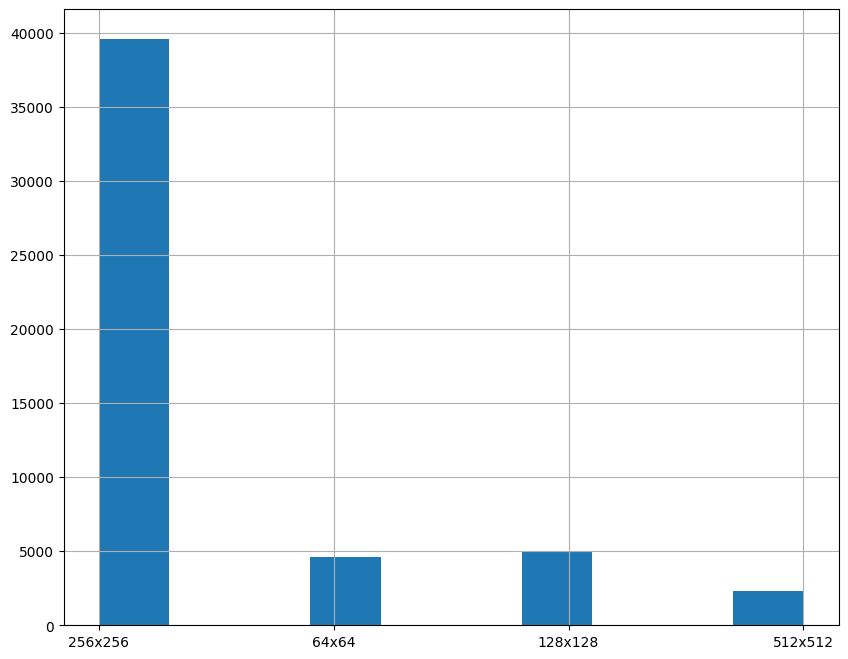

In [ ]:
df['Dimensão'].hist(figsize = (10,8))


39628

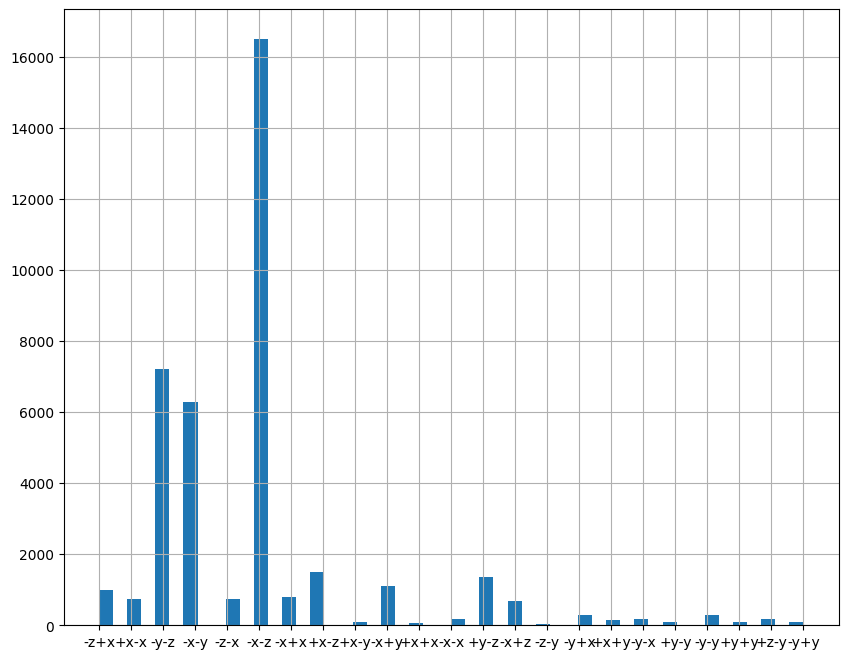

In [ ]:
dimensao_index = np.where((df['Dimensão'] == '256x256'))[0]
orientacoes = df['Orientação']

orientacoes[dimensao_index].hist(xlabelsize = 10, bins = 50,figsize = (10,8))

orientacoes[dimensao_index].count()
#orientacoes.hist(xlabelsize = 5, bins = 50)

<Axes: xlabel='Orientação', ylabel='Dimensão'>

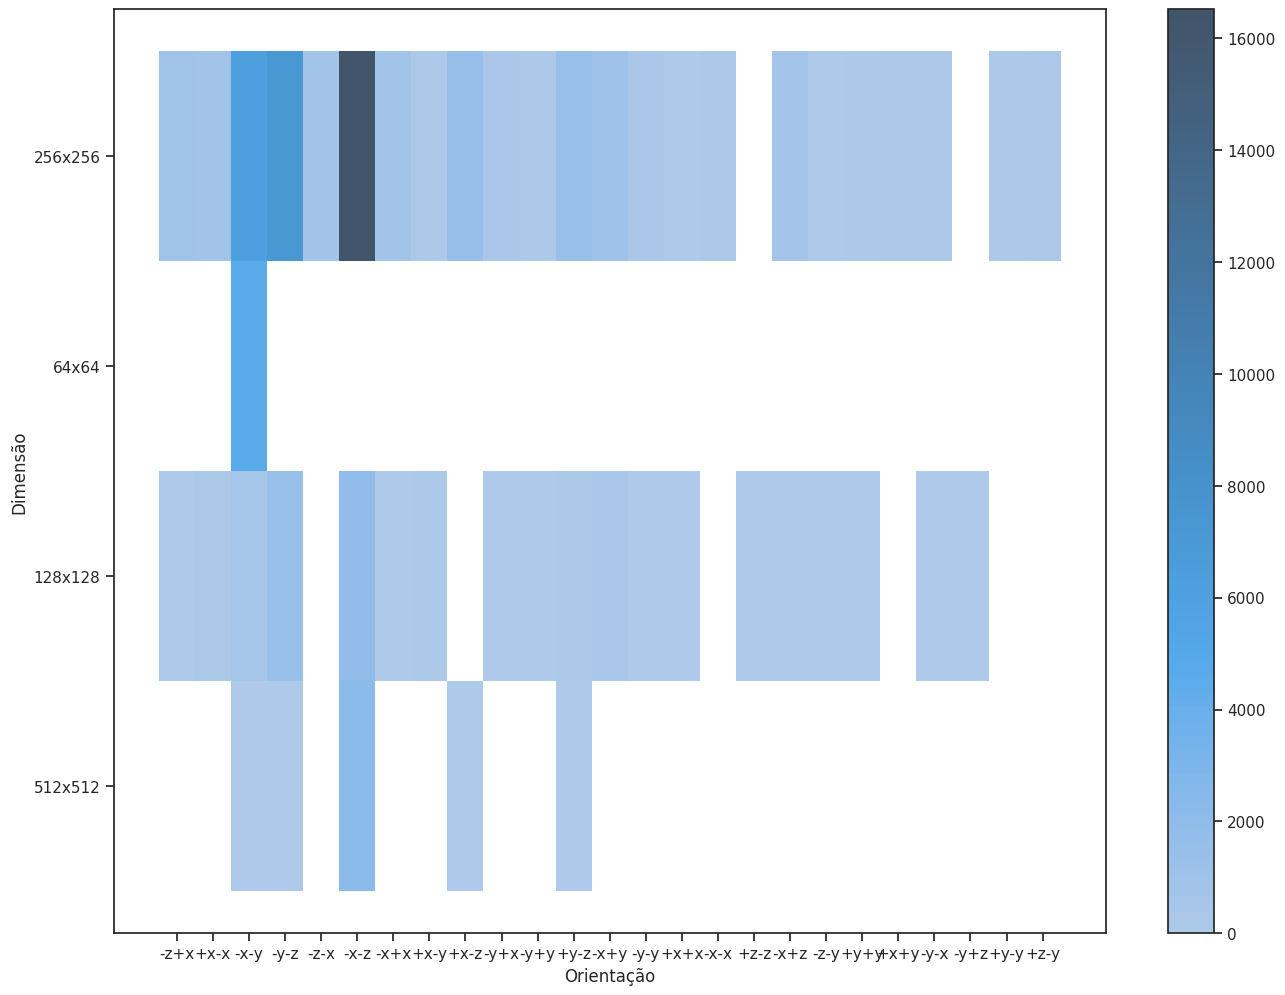

In [ ]:
plt.figure(figsize=(16,12))
sns.set(style="ticks", palette="pastel")
sns.histplot(x="Orientação", y = "Dimensão",
            #hue="Dimensão", palette=["m", "g", "b", "y"], showfliers=False,
            #hue="ID Paciente",
             cbar = True,
            data=df)

<Axes: xlabel='Orientação', ylabel='ID Paciente'>

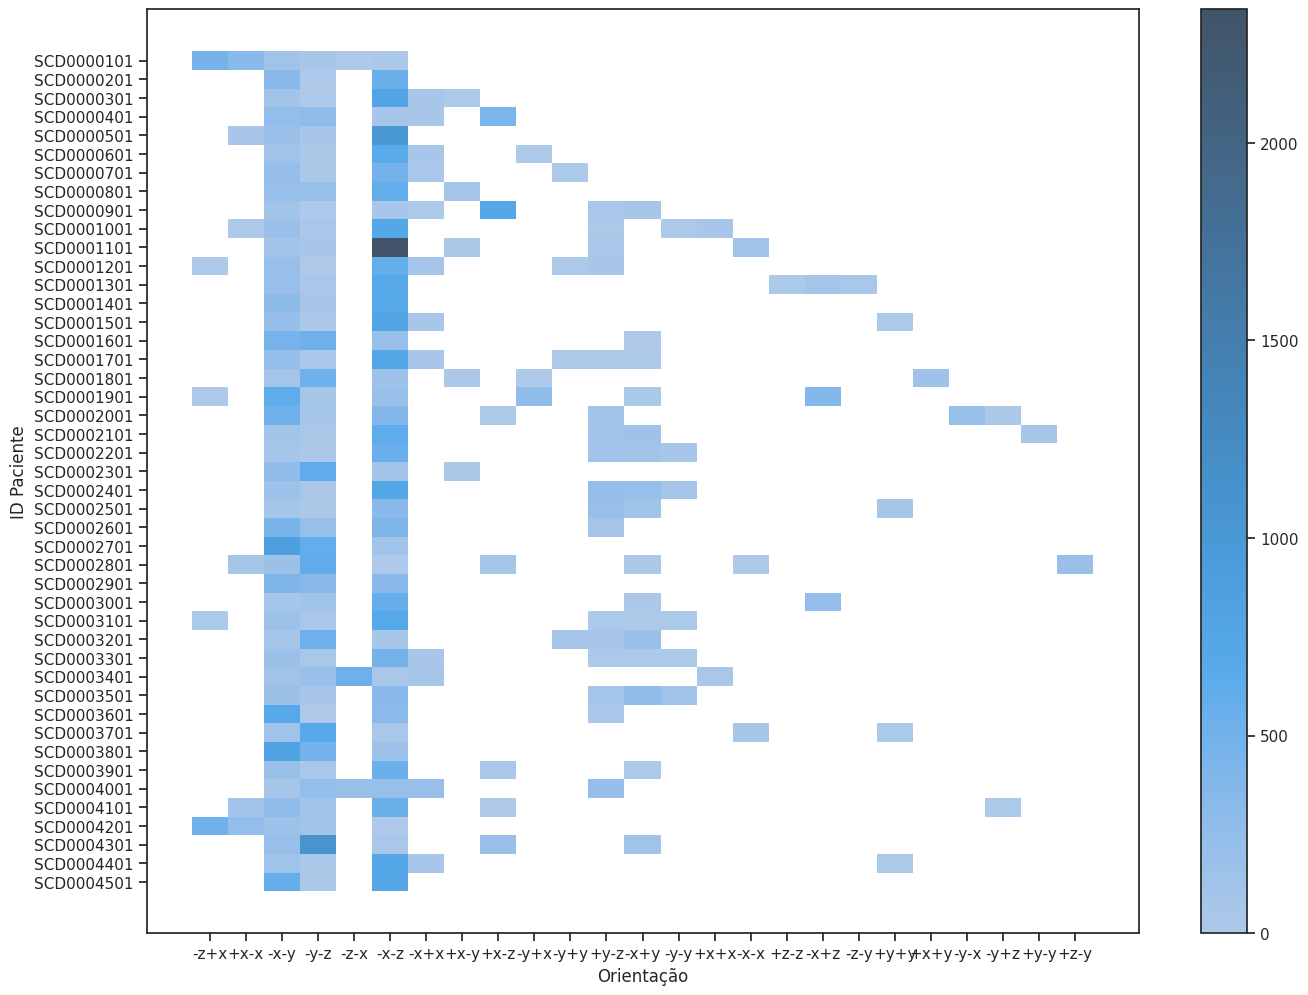

In [ ]:
plt.figure(figsize=(16,12))
sns.set(style="ticks", palette="pastel")
sns.histplot(x="Orientação", y = "ID Paciente",
            #hue="Dimensão", palette=["m", "g", "b", "y"], showfliers=False,
            #hue="Classe",
            cbar = True,
            data=df)

<Axes: xlabel='Dimensão', ylabel='ID Paciente'>

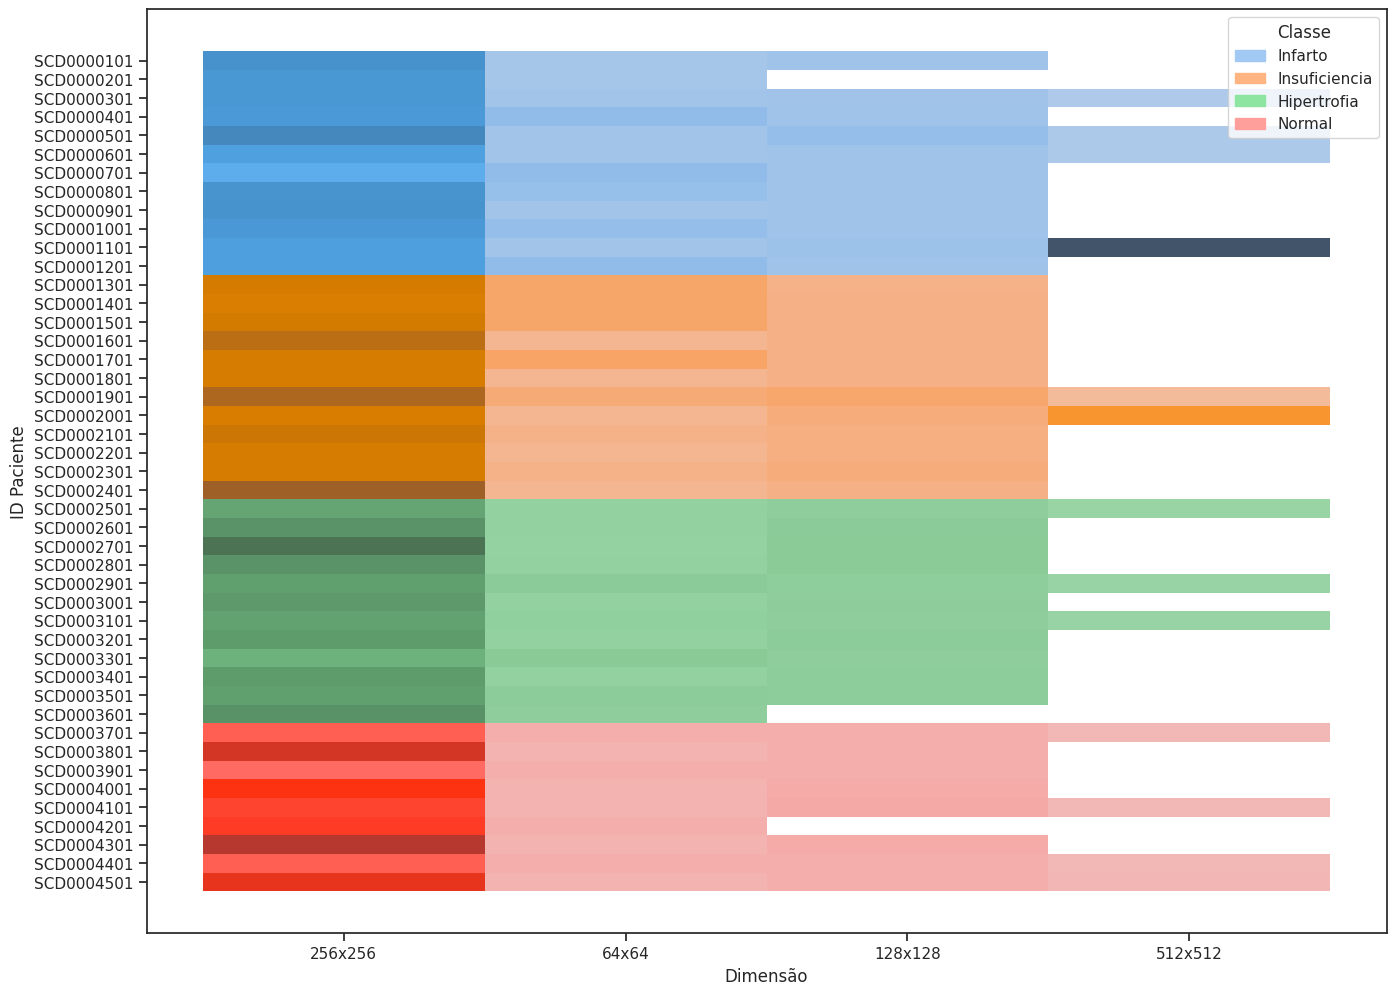

In [ ]:
plt.figure(figsize=(16,12))
sns.set(style="ticks", palette="pastel")
sns.histplot(x="Dimensão", y = "ID Paciente",
            #hue="Dimensão", palette=["m", "g", "b", "y"], showfliers=False,
            #hue="Classe", cbar=True,
             hue="Classe",
             #cbar=True,
            data=df)

<Axes: xlabel='Dimensão', ylabel='Count'>

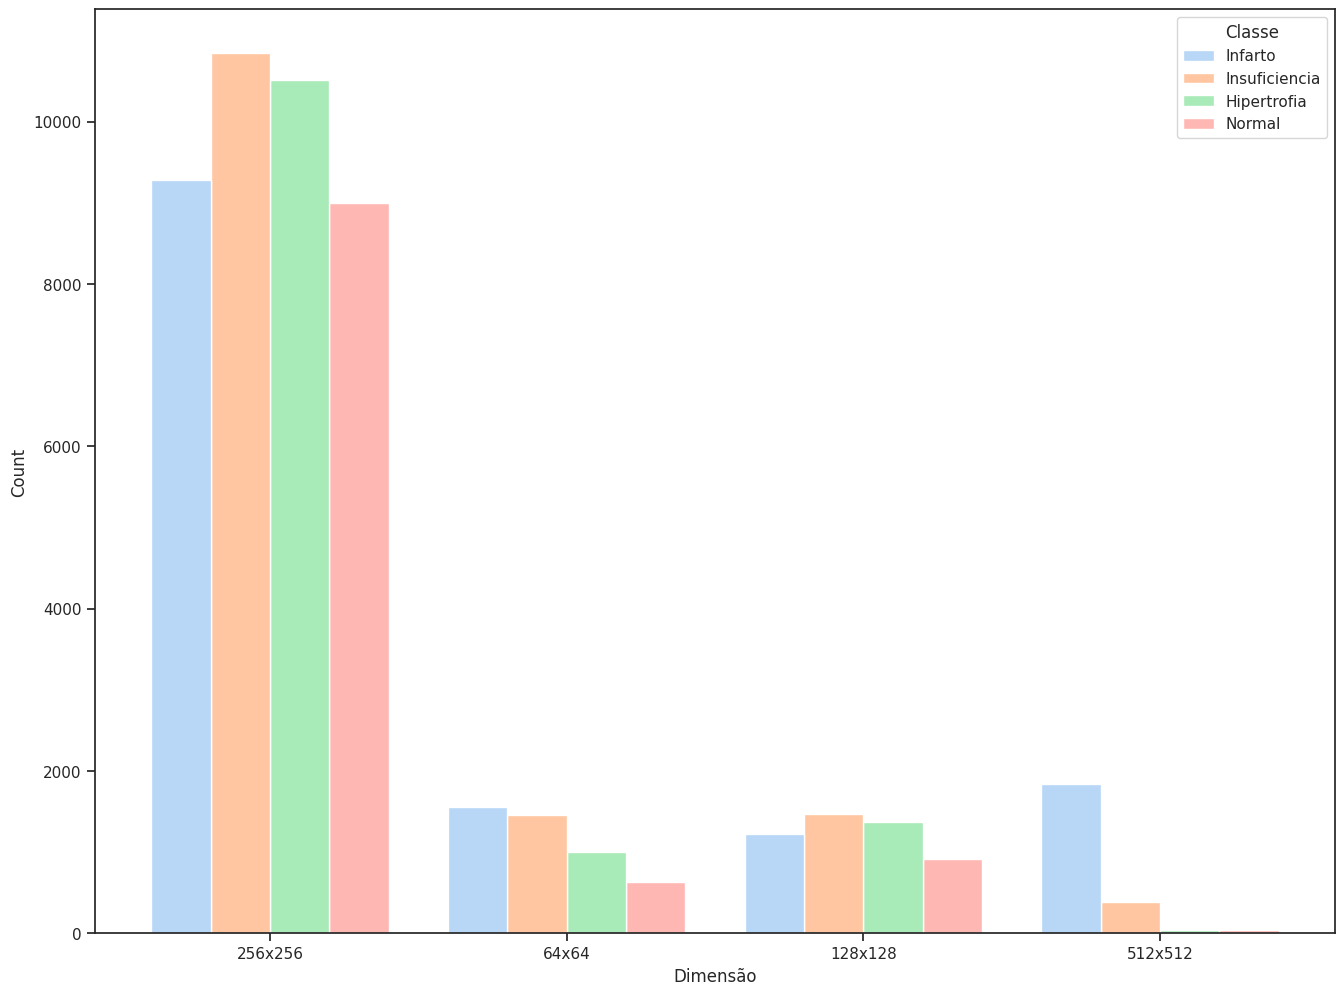

In [ ]:
plt.figure(figsize=(16,12))
sns.set(style="ticks", palette="pastel")
sns.histplot(x="Dimensão", #y = "ID Paciente",
            #hue="Dimensão", palette=["m", "g", "b", "y"], showfliers=False,
            #hue="Classe", cbar=True,
             hue="Classe",
             multiple="dodge",
             shrink=.8,
             #cbar=True,
            data=df)

<Axes: xlabel='Orientação', ylabel='Count'>

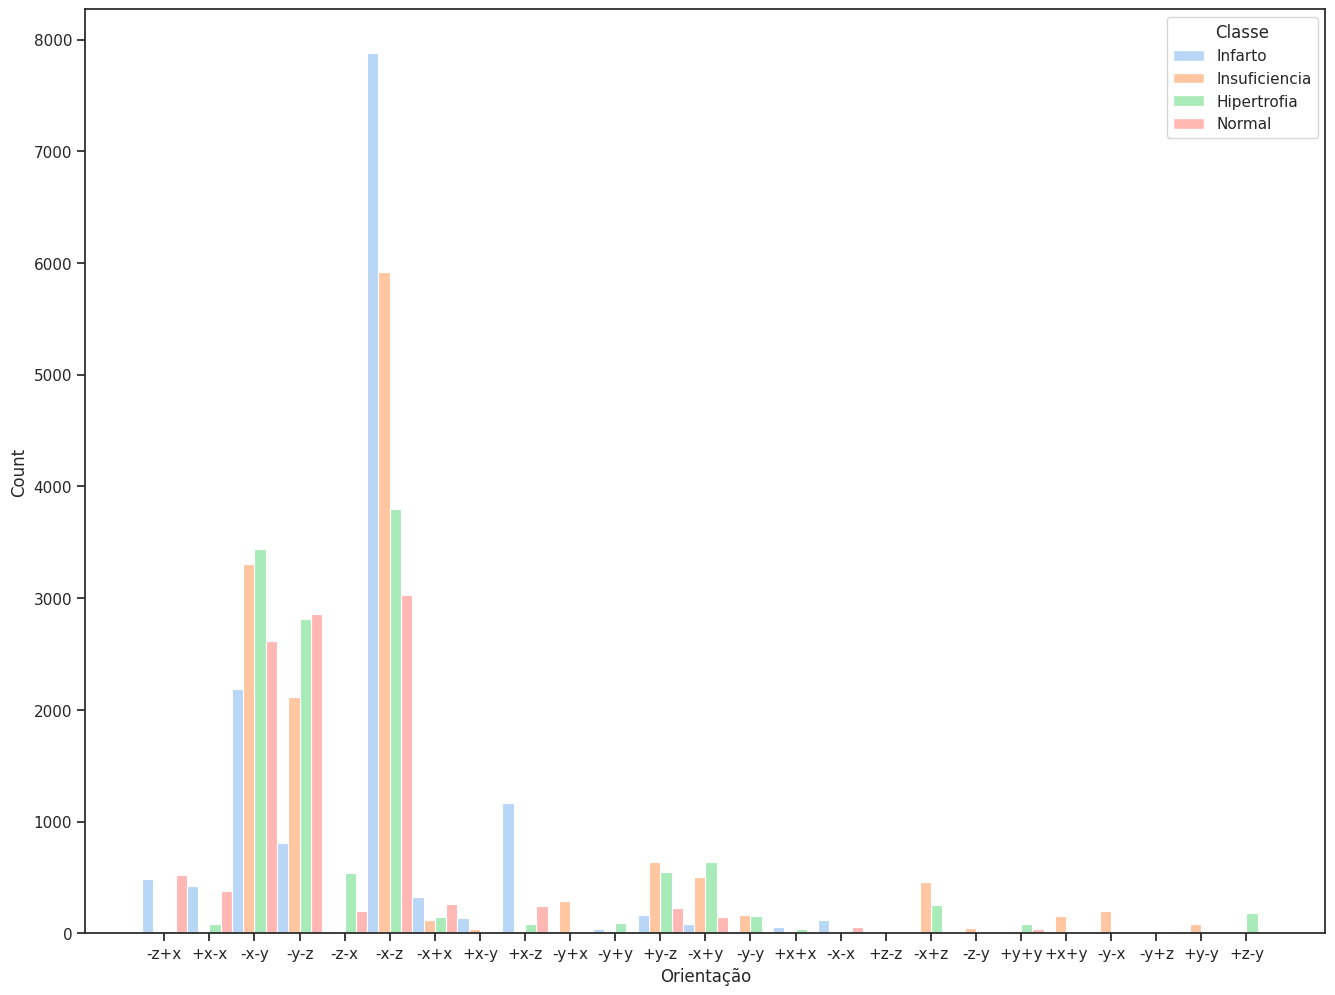

In [ ]:
plt.figure(figsize=(16,12))
sns.set(style="ticks", palette="pastel")
sns.histplot(x="Orientação", #y = "ID Paciente",
            #hue="Dimensão", palette=["m", "g", "b", "y"], showfliers=False,
            hue="Classe",
            #hue="Classe",
            multiple="dodge",
            #shrink=.8,
            #cbar=True,
            data=df)

<Axes: xlabel='Dimensão', ylabel='Count'>

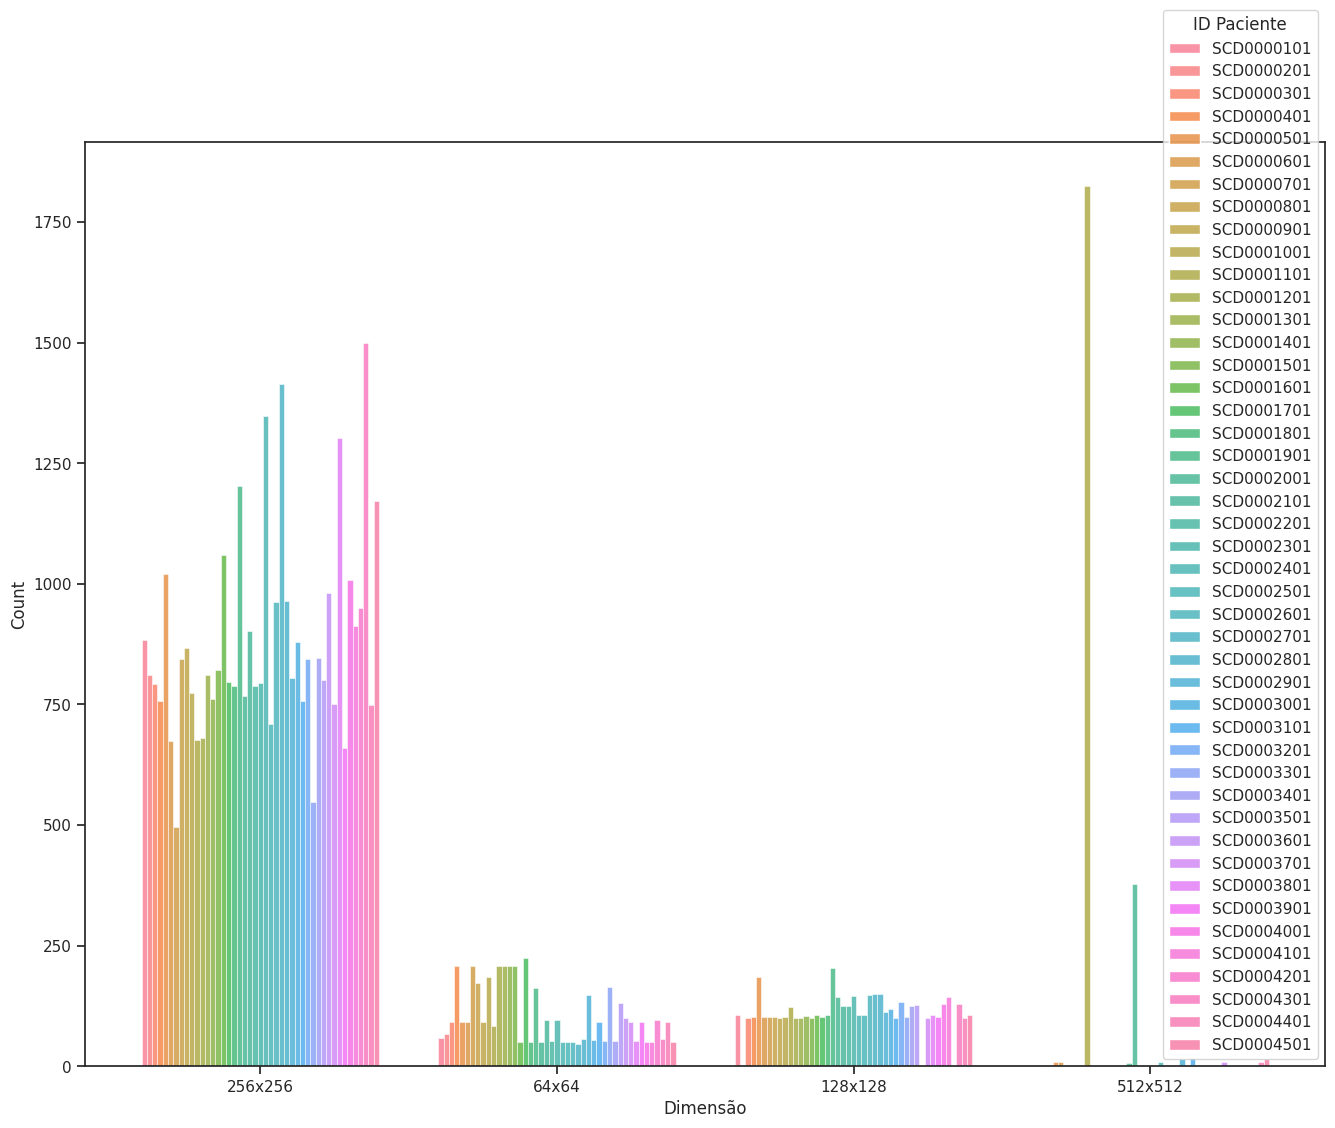

In [ ]:
plt.figure(figsize=(16,12))
sns.set(style="ticks", palette="pastel")
sns.histplot(x="Dimensão", #y = "ID Paciente",
            #hue="Dimensão", palette=["m", "g", "b", "y"], showfliers=False,
            hue="ID Paciente",
            #hue="Classe",
            multiple="dodge",
            shrink=.8,
            #cbar=True,
            data=df)

In [ ]:
#Dataframe filtrado apenas com a dimensão e orientação mais presente no dataset.

df_filtrado = df.loc[
    (df['Dimensão'] == '256x256') &
    (df['Orientação'] == '-x-z')
]

NameError: ignored

In [ ]:
df_filtrado

,ID Paciente,Caminho das imagens,Nome das imagens,Orientação,Dimensão,Classe
4,SCD0000101,/content/SCD0000101/1.512_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000101_MR__hrt_raw_20120813120600599_1...,-x-z,256x256,Infarto
41,SCD0000101,/content/SCD0000101/1.512_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000101_MR__hrt_raw_20120813120600579_1...,-x-z,256x256,Infarto
489,SCD0000101,/content/SCD0000101/1.512_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000101_MR__hrt_raw_20120813120600622_1...,-x-z,256x256,Infarto
941,SCD0000101,/content/SCD0000101/1.512_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000101_MR__hrt_raw_20120813120600640_1...,-x-z,256x256,Infarto
986,SCD0000101,/content/SCD0000101/1.512_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000101_MR__hrt_raw_20120813120600555_1...,-x-z,256x256,Infarto
...,...,...,...,...,...,...
51536,SCD0004501,/content/SCD0004501/1.484_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004501_MR__hrt_raw_20120813124314691_2...,-x-z,256x256,Normal
51537,SCD0004501,/content/SCD0004501/1.484_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004501_MR__hrt_raw_20120813124314819_2...,-x-z,256x256,Normal
51538,SCD0004501,/content/SCD0004501/1.484_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004501_MR__hrt_raw_20120813124315073_2...,-x-z,256x256,Normal
51540,SCD0004501,/content/SCD0004501/1.216_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004501_MR__hrt_raw_20120813124309262_6...,-x-z,256x256,Normal


In [ ]:
df_filtrado.to_csv("df_filtrado.csv", index = False)

<Axes: xlabel='Dimensão', ylabel='Count'>

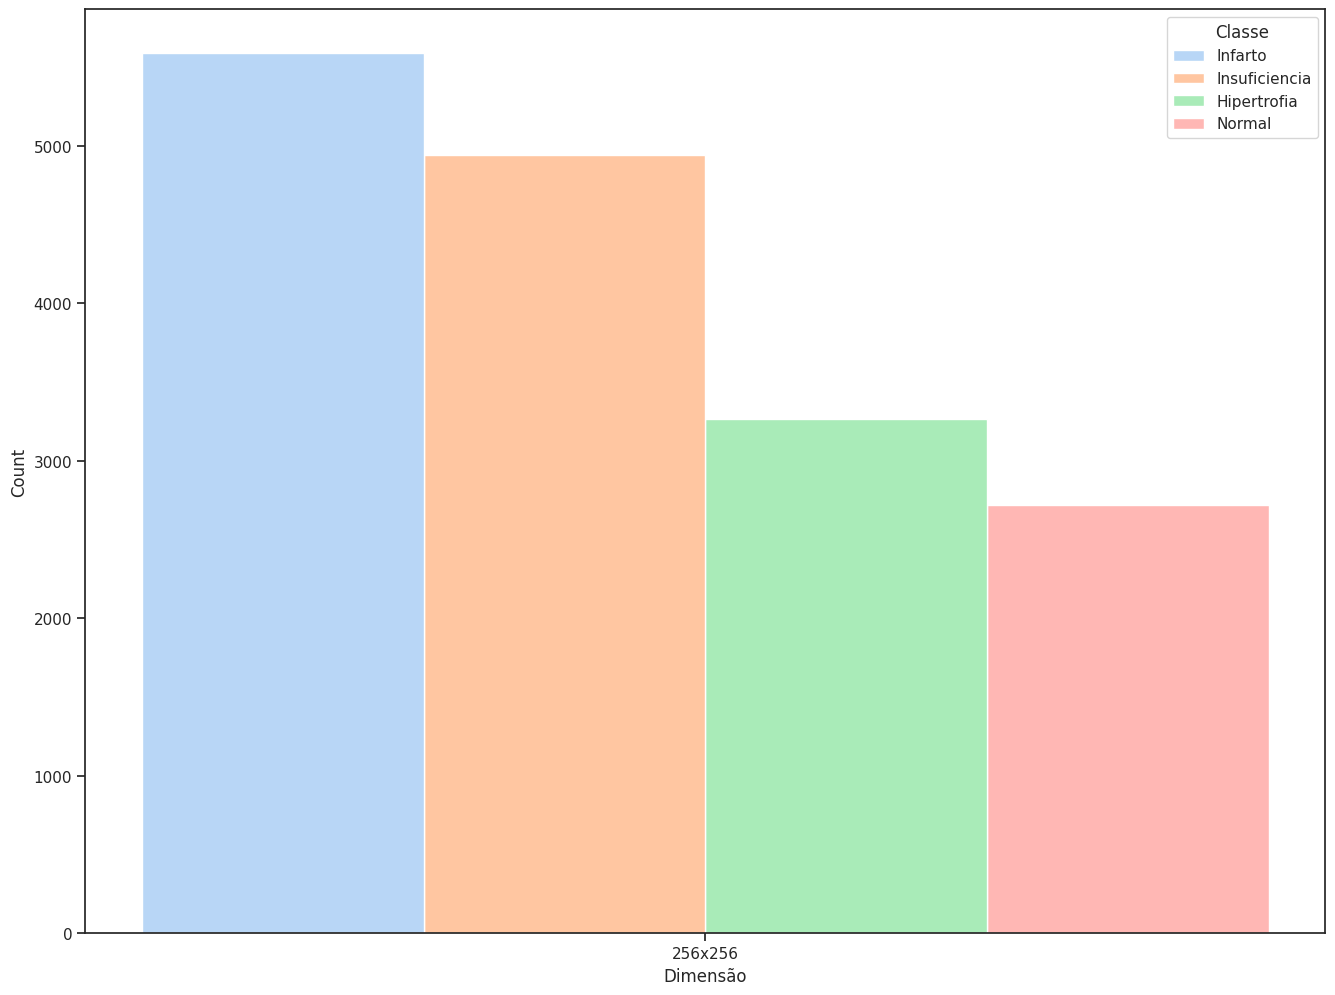

In [ ]:
plt.figure(figsize=(16,12))
sns.set(style="ticks", palette="pastel")
sns.histplot(x="Dimensão", #y = "ID Paciente",
            #hue="Dimensão", palette=["m", "g", "b", "y"], showfliers=False,
            hue="Classe",
            #hue="Classe",
            multiple="dodge",
            shrink=.8,
            #cbar=True,
            data=df_filtrado)

<Axes: xlabel='Orientação', ylabel='Count'>

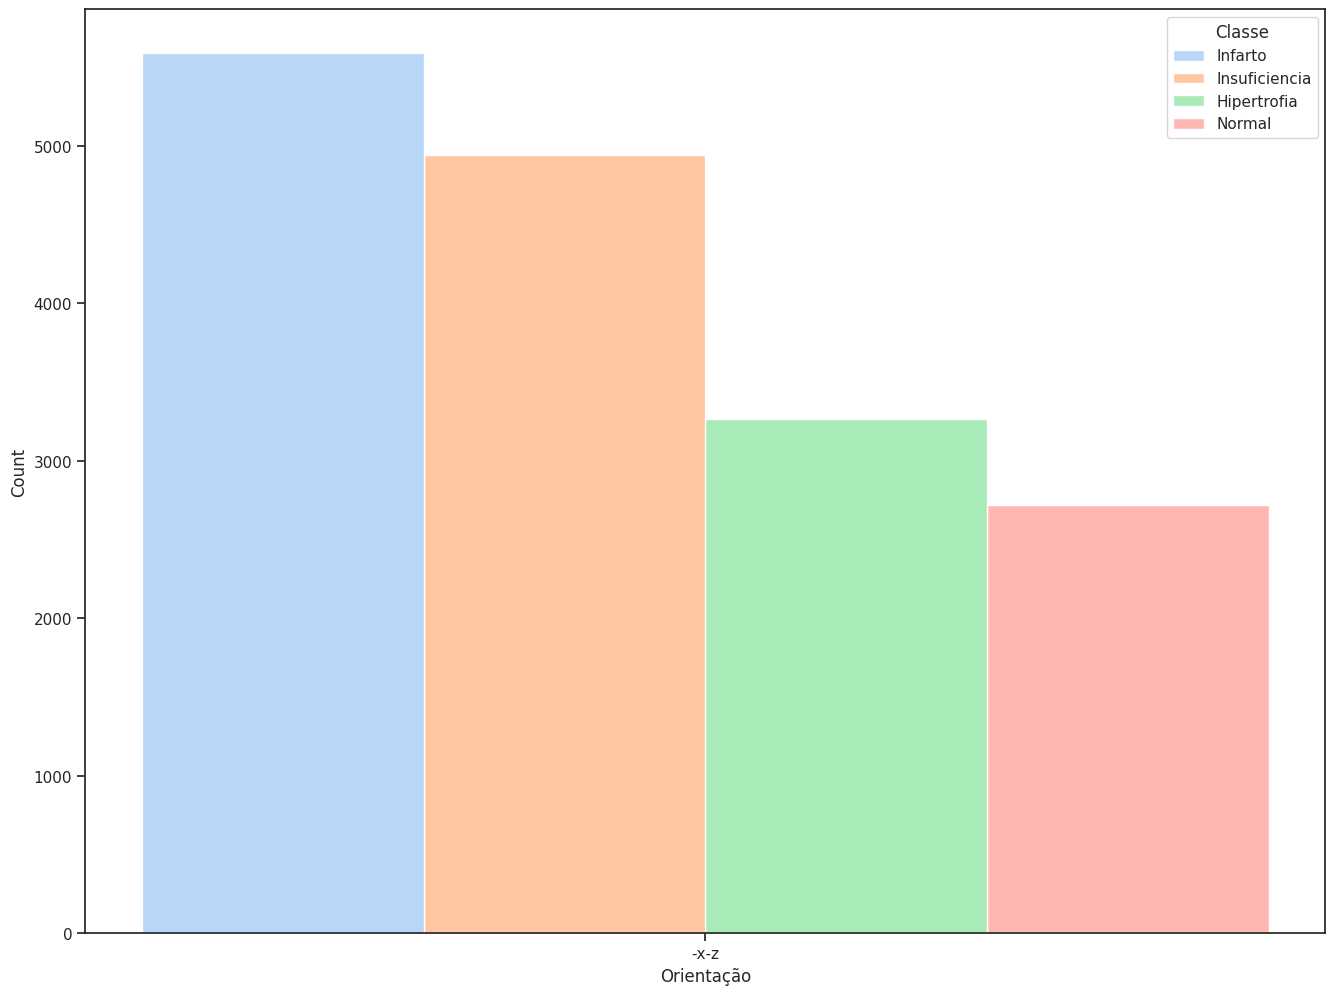

In [ ]:
plt.figure(figsize=(16,12))
sns.set(style="ticks", palette="pastel")
sns.histplot(x="Orientação", #y = "ID Paciente",
            #hue="Dimensão", palette=["m", "g", "b", "y"], showfliers=False,
            hue="Classe",
            #hue="Classe",
            multiple="dodge",
            shrink=.8,
            #cbar=True,
            data=df_filtrado)

<Axes: xlabel='Classe', ylabel='ID Paciente'>

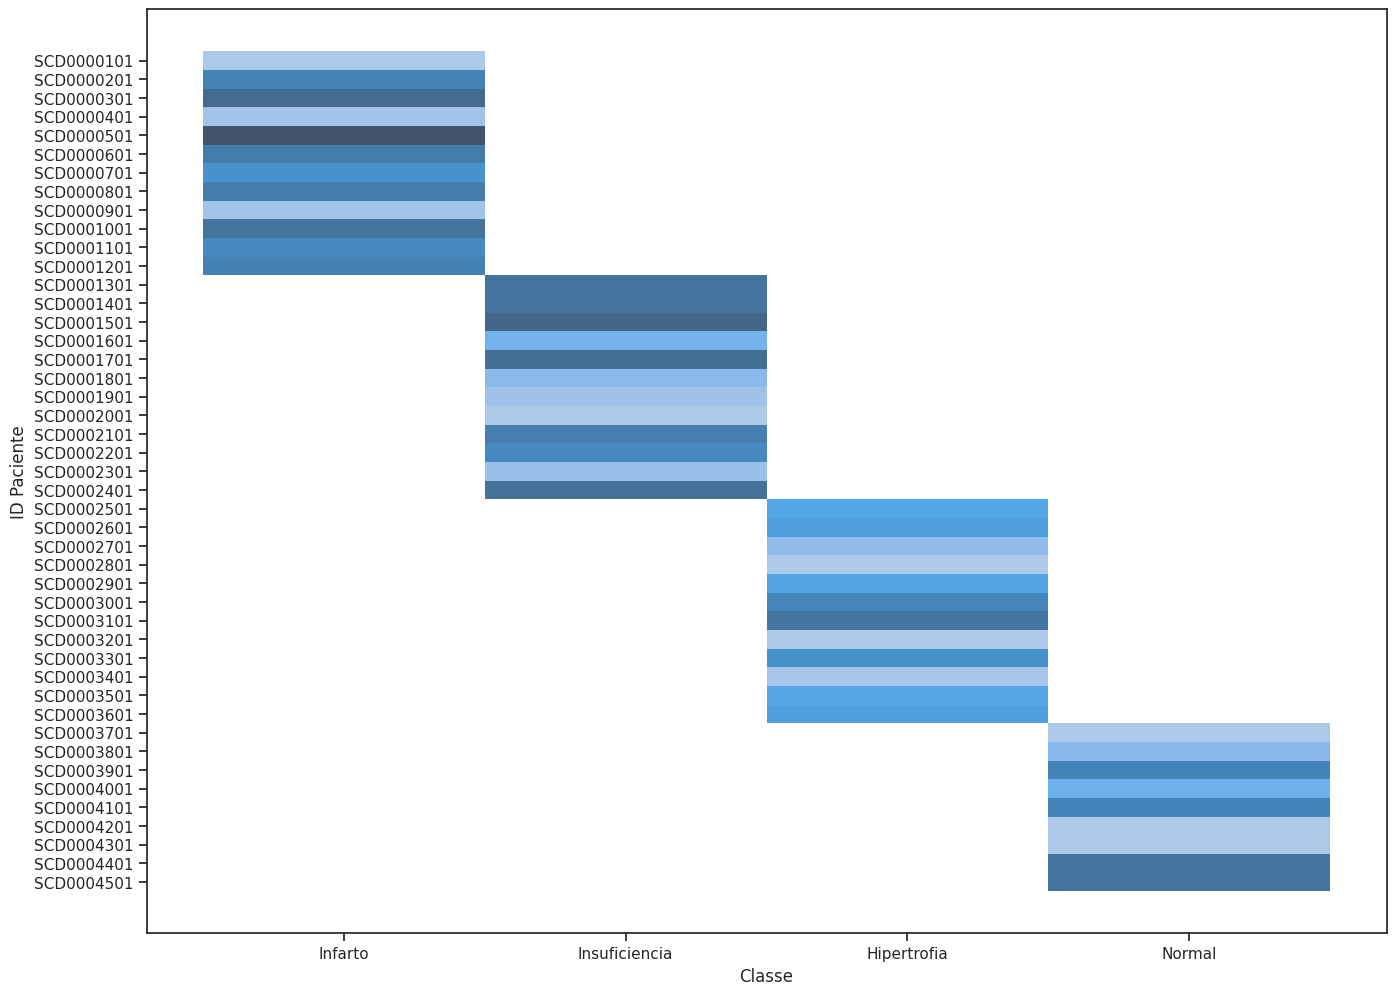

In [ ]:
plt.figure(figsize=(16,12))
sns.set(style="ticks", palette="pastel")
sns.histplot(x="Classe", y = "ID Paciente",
            #hue="Dimensão", palette=["m", "g", "b", "y"], showfliers=False,
            #hue="ID Paciente",
            #hue="ID Paciente",
            multiple="dodge",
            shrink=.8,
            #cbar=True,
            data=df_filtrado)

In [ ]:

# Definir a semente aleatória
random.seed(42)

# Lista de pacientes para cada classe
pacientes_classe_1 = list(range(0, 12)) #Infarto
pacientes_classe_2 = list(range(12,24)) #Insuficiencia
pacientes_classe_3 = list(range(24,36)) #Hipertrofia
pacientes_classe_4 = list(range(36,45)) #Normal

# Construindo o conjunto de teste
paciente_1 = random.choices(pacientes_classe_1, k=2)
paciente_2 = random.choices(pacientes_classe_2, k=2)
paciente_3 = random.choices(pacientes_classe_3, k=2)
paciente_4 = random.choices(pacientes_classe_4, k=2)

pacientes_sorteados = np.array([paciente_1[0], paciente_2[0], paciente_3[0], paciente_4[0],paciente_1[1], paciente_2[1], paciente_3[1], paciente_4[1]])

lista_teste = pacientes[pacientes_sorteados]




In [ ]:
lista_teste

7     SCD0000801
15    SCD0001601
32    SCD0003301
44    SCD0004501
0     SCD0000101
14    SCD0001501
32    SCD0003301
36    SCD0003701
Name: PatientID, dtype: object

In [ ]:
pacientes_infarto_teste

7    SCD0000801
0    SCD0000101
Name: PatientID, dtype: object

In [ ]:
pacientes_insuficiencia_teste

15    SCD0001601
14    SCD0001501
Name: PatientID, dtype: object

In [ ]:
pacientes_hipertrofia_teste

32    SCD0003301
32    SCD0003301
Name: PatientID, dtype: object

In [ ]:
pacientes_normal_teste

44    SCD0004501
36    SCD0003701
Name: PatientID, dtype: object

In [ ]:
#dataframe filtrado com apenas os pacientes sorteados para teste.

df_teste = df_filtrado.loc[
    (df_filtrado['ID Paciente'].isin(lista_teste))
]

df_teste


,ID Paciente,Caminho das imagens,Nome das imagens,Orientação,Dimensão,Classe
4,SCD0000101,/content/SCD0000101/1.512_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000101_MR__hrt_raw_20120813120600599_1...,-x-z,256x256,Infarto
41,SCD0000101,/content/SCD0000101/1.512_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000101_MR__hrt_raw_20120813120600579_1...,-x-z,256x256,Infarto
489,SCD0000101,/content/SCD0000101/1.512_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000101_MR__hrt_raw_20120813120600622_1...,-x-z,256x256,Infarto
941,SCD0000101,/content/SCD0000101/1.512_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000101_MR__hrt_raw_20120813120600640_1...,-x-z,256x256,Infarto
986,SCD0000101,/content/SCD0000101/1.512_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000101_MR__hrt_raw_20120813120600555_1...,-x-z,256x256,Infarto
...,...,...,...,...,...,...
51536,SCD0004501,/content/SCD0004501/1.484_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004501_MR__hrt_raw_20120813124314691_2...,-x-z,256x256,Normal
51537,SCD0004501,/content/SCD0004501/1.484_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004501_MR__hrt_raw_20120813124314819_2...,-x-z,256x256,Normal
51538,SCD0004501,/content/SCD0004501/1.484_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004501_MR__hrt_raw_20120813124315073_2...,-x-z,256x256,Normal
51540,SCD0004501,/content/SCD0004501/1.216_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004501_MR__hrt_raw_20120813124309262_6...,-x-z,256x256,Normal


In [ ]:
df_teste.to_csv('df_teste.csv', index = False)

<Axes: xlabel='Orientação', ylabel='Count'>

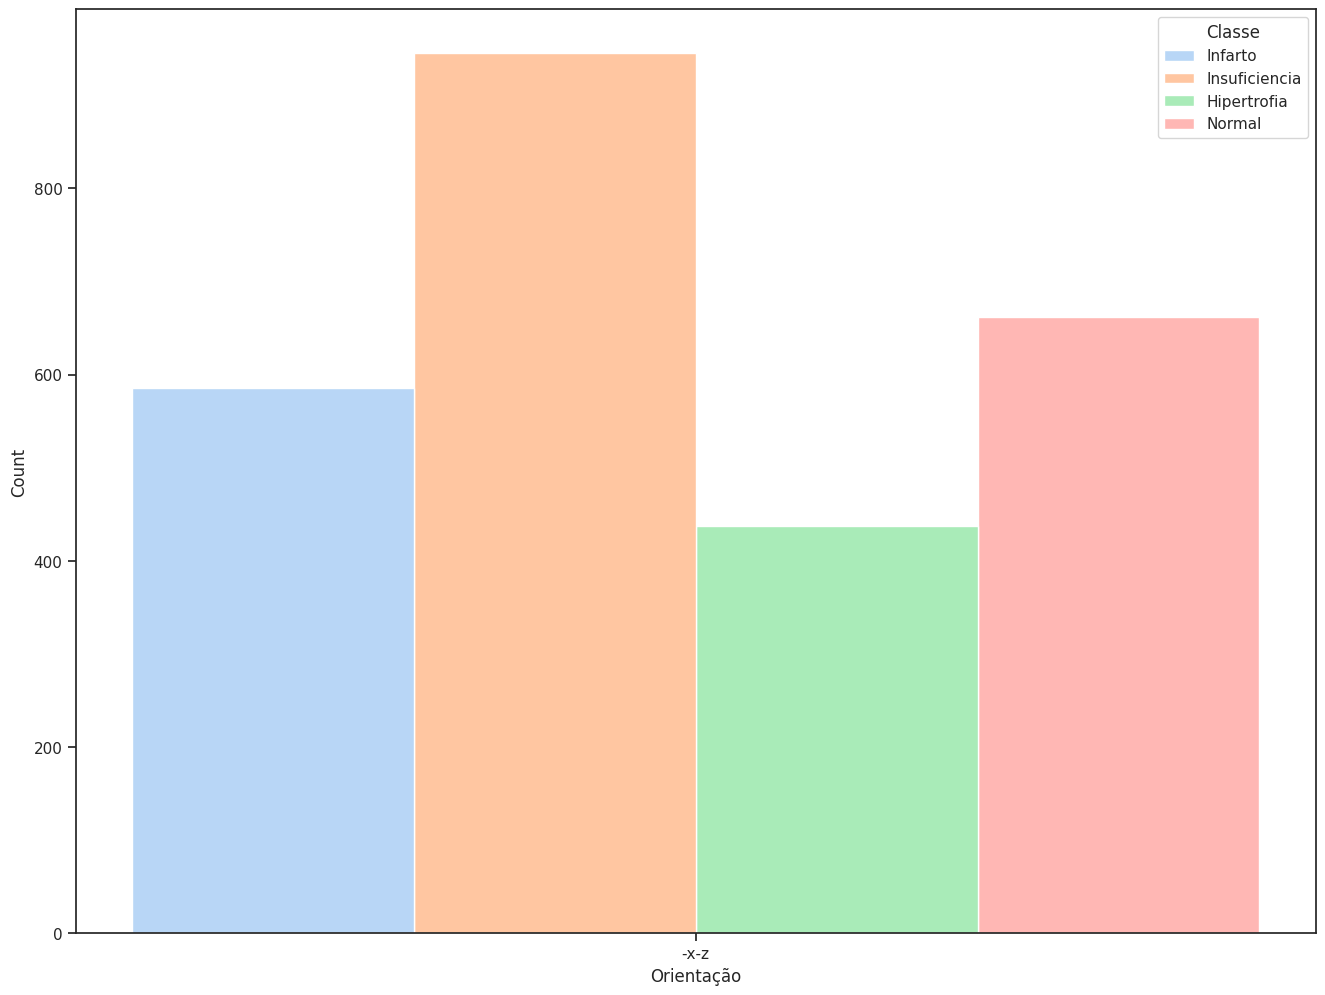

In [ ]:
plt.figure(figsize=(16,12))
sns.set(style="ticks", palette="pastel")
sns.histplot(x="Orientação", #y = "ID Paciente",
            #hue="Dimensão", palette=["m", "g", "b", "y"], showfliers=False,
            hue="Classe",
            #hue="Classe",
            multiple="dodge",
            shrink=.8,
            #cbar=True,
            data=df_teste)

In [ ]:
#dataframe de treino filtrado sem os pacientes listados como teste.
df_treino = df_filtrado.loc[
    (~df_filtrado['ID Paciente'].isin(lista_teste))
]

df_treino

,ID Paciente,Caminho das imagens,Nome das imagens,Orientação,Dimensão,Classe
1050,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120635347_1...,-x-z,256x256,Infarto
1051,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120635212_1...,-x-z,256x256,Infarto
1052,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120635184_1...,-x-z,256x256,Infarto
1053,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120635224_1...,-x-z,256x256,Infarto
1054,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120635240_1...,-x-z,256x256,Infarto
...,...,...,...,...,...,...
50196,SCD0004401,/content/SCD0004401/1.632_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004401_MR__hrt_raw_20120813124228799_6...,-x-z,256x256,Normal
50197,SCD0004401,/content/SCD0004401/1.632_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004401_MR__hrt_raw_20120813124228903_1...,-x-z,256x256,Normal
50198,SCD0004401,/content/SCD0004401/1.632_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004401_MR__hrt_raw_20120813124229123_1...,-x-z,256x256,Normal
50199,SCD0004401,/content/SCD0004401/1.632_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004401_MR__hrt_raw_20120813124228738_3...,-x-z,256x256,Normal


In [ ]:
df_treino.to_csv('df_treino.csv', index = False)

<Axes: xlabel='Classe', ylabel='Count'>

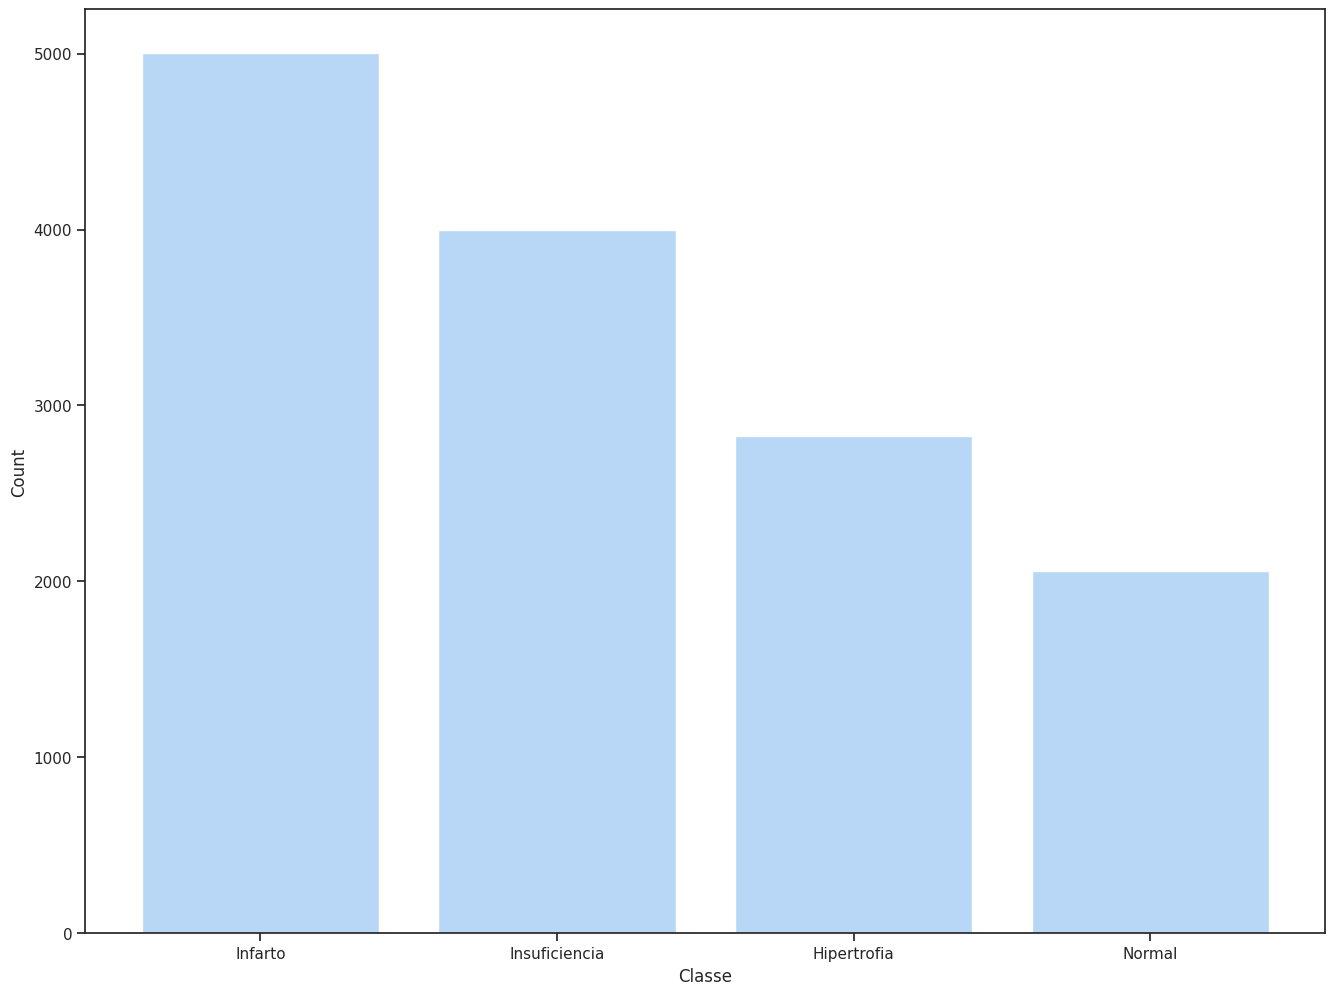

In [ ]:
plt.figure(figsize=(16,12))
sns.set(style="ticks", palette="pastel")
sns.histplot(x="Classe", #y = "ID Paciente",
            #hue="Dimensão", palette=["m", "g", "b", "y"], showfliers=False,
            #hue="Classe",
            #hue="Classe",
            multiple="dodge",
            shrink=.8,
            #cbar=True,
            data=df_treino)

In [ ]:
Pacientes_df_treino = df_treino['ID Paciente'].unique()

In [ ]:
Pacientes_df_treino

array(['SCD0000201', 'SCD0000301', 'SCD0000401', 'SCD0000501',
       'SCD0000601', 'SCD0000701', 'SCD0000901', 'SCD0001001',
       'SCD0001101', 'SCD0001201', 'SCD0001301', 'SCD0001401',
       'SCD0001701', 'SCD0001801', 'SCD0001901', 'SCD0002001',
       'SCD0002101', 'SCD0002201', 'SCD0002301', 'SCD0002401',
       'SCD0002501', 'SCD0002601', 'SCD0002701', 'SCD0002801',
       'SCD0002901', 'SCD0003001', 'SCD0003101', 'SCD0003201',
       'SCD0003401', 'SCD0003501', 'SCD0003601', 'SCD0003801',
       'SCD0003901', 'SCD0004001', 'SCD0004101', 'SCD0004201',
       'SCD0004301', 'SCD0004401'], dtype=object)

In [ ]:
#Sorteio dos pacientes para validação cruzada.

# Definir a semente aleatória
random.seed(42)

# Lista de pacientes para cada classe
pacientes_classe_1 = list(range(0, 10)) #Infarto
pacientes_classe_2 = list(range(10,20)) #Insuficiencia
pacientes_classe_3 = list(range(20,31)) #Hipertrofia
pacientes_classe_4 = list(range(31,38)) #Normal



# Sortear um paciente de cada classe
#fold1
paciente_1_f1 = random.choice(pacientes_classe_1)
paciente_2_f1 = random.choice(pacientes_classe_2)
paciente_3_f1 = random.choice(pacientes_classe_3)
paciente_4_f1 = random.choice(pacientes_classe_4)

#fold2
paciente_1_f2= random.choice(pacientes_classe_1)
paciente_2_f2= random.choice(pacientes_classe_2)
paciente_3_f2 = random.choice(pacientes_classe_3)
paciente_4_f2 = random.choices(pacientes_classe_4,k=2)

#hipertrofia
paciente_1_f3 = random.choice(pacientes_classe_1)
paciente_2_f3 = random.choice(pacientes_classe_2)
paciente_3_f3 = random.choice(pacientes_classe_3)
paciente_4_f3 = random.choice(pacientes_classe_4)

#normal
paciente_1_f4 = random.choice(pacientes_classe_1)
paciente_2_f4 = random.choice(pacientes_classe_2)
paciente_3_f4 = random.choice(pacientes_classe_3)
paciente_4_f4 = random.choice(pacientes_classe_4)

# Salvar os pacientes sorteados em um vetor
pacientes_sorteados_f1 = np.array([paciente_1_f1, paciente_2_f1, paciente_3_f1, paciente_4_f1])
pacientes_sorteados_f2 = np.array([paciente_1_f2, paciente_2_f2, paciente_3_f2, paciente_4_f2[1]])
pacientes_sorteados_f3 = np.array([paciente_1_f3, paciente_2_f3, paciente_3_f3, paciente_4_f3 ])
pacientes_sorteados_f4 = np.array([paciente_1_f4, paciente_2_f4, paciente_3_f4, paciente_4_f4])

# Imprimir os pacientes sorteados
fold1 = Pacientes_df_treino[pacientes_sorteados_f1]
fold2 = Pacientes_df_treino[pacientes_sorteados_f2]
fold3 = Pacientes_df_treino[pacientes_sorteados_f3]
fold4 = Pacientes_df_treino[pacientes_sorteados_f4]

In [ ]:
fold1

array(['SCD0000301', 'SCD0001301', 'SCD0002901', 'SCD0003901'],
      dtype=object)

In [ ]:
fold2

array(['SCD0000501', 'SCD0001701', 'SCD0002601', 'SCD0004401'],
      dtype=object)

In [ ]:
fold3

array(['SCD0000301', 'SCD0002401', 'SCD0003101', 'SCD0003801'],
      dtype=object)

In [ ]:
fold4

array(['SCD0000201', 'SCD0001401', 'SCD0002801', 'SCD0003901'],
      dtype=object)

In [ ]:
#dataframe fold1 validação cruzada
df_fold1 = df_treino.loc[
    (df_treino['ID Paciente'].isin(fold1))
]

In [ ]:
df_fold1

,ID Paciente,Caminho das imagens,Nome das imagens,Orientação,Dimensão,Classe
1945,SCD0000301,/content/SCD0000301/2.592_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0000301_MR__hrt_raw_20120813120704733_6...,-x-z,256x256,Infarto
1946,SCD0000301,/content/SCD0000301/1.676_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0000301_MR__hrt_raw_20120813120704055_1...,-x-z,256x256,Infarto
1947,SCD0000301,/content/SCD0000301/1.676_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0000301_MR__hrt_raw_20120813120703873_1...,-x-z,256x256,Infarto
1948,SCD0000301,/content/SCD0000301/1.676_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0000301_MR__hrt_raw_20120813120703984_1...,-x-z,256x256,Infarto
1949,SCD0000301,/content/SCD0000301/1.676_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0000301_MR__hrt_raw_20120813120703790_1...,-x-z,256x256,Infarto
...,...,...,...,...,...,...
44166,SCD0003901,/content/SCD0003901/1.608_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0003901_MR__hrt_raw_20120813123811564_1...,-x-z,256x256,Normal
44171,SCD0003901,/content/SCD0003901/3.232_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0003901_MR__hrt_raw_20120813123822725_5...,-x-z,256x256,Normal
44177,SCD0003901,/content/SCD0003901/3.232_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0003901_MR__hrt_raw_20120813123822542_1...,-x-z,256x256,Normal
44178,SCD0003901,/content/SCD0003901/3.232_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0003901_MR__hrt_raw_20120813123822689_3...,-x-z,256x256,Normal


In [ ]:
df_fold1.to_csv('fold1.csv', index = False)

<Axes: xlabel='Orientação', ylabel='Count'>

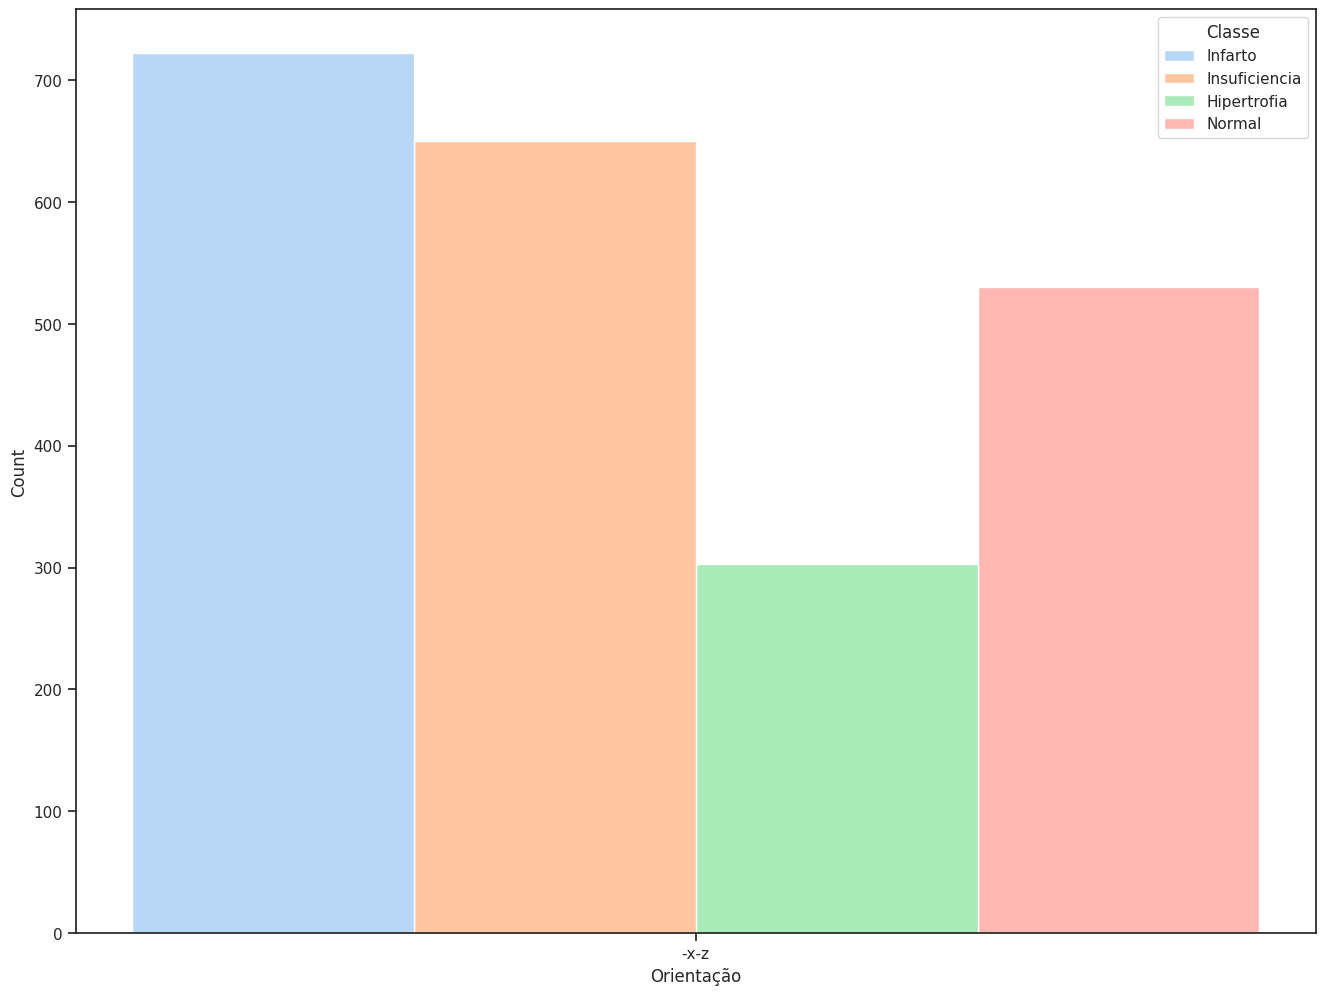

In [ ]:
plt.figure(figsize=(16,12))
sns.set(style="ticks", palette="pastel")
sns.histplot(x="Orientação", #y = "ID Paciente",
            #hue="Dimensão", palette=["m", "g", "b", "y"], showfliers=False,
            hue="Classe",
            #hue="Classe",
            multiple="dodge",
            shrink=.8,
            #cbar=True,
            data=df_fold1)

In [ ]:
#dataframe fold2 validação cruzada
df_fold2 = df_treino.loc[
    (df_treino['ID Paciente'].isin(fold2))
]

In [ ]:
df_fold2

,ID Paciente,Caminho das imagens,Nome das imagens,Orientação,Dimensão,Classe
3978,SCD0000501,/content/SCD0000501/1.652_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0000501_MR__hrt_raw_20120813120824806_1...,-x-z,256x256,Infarto
3979,SCD0000501,/content/SCD0000501/1.652_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0000501_MR__hrt_raw_20120813120824764_1...,-x-z,256x256,Infarto
3980,SCD0000501,/content/SCD0000501/1.652_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0000501_MR__hrt_raw_20120813120824787_1...,-x-z,256x256,Infarto
3981,SCD0000501,/content/SCD0000501/1.652_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0000501_MR__hrt_raw_20120813120824859_1...,-x-z,256x256,Infarto
3982,SCD0000501,/content/SCD0000501/1.652_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0000501_MR__hrt_raw_20120813120824615_1...,-x-z,256x256,Infarto
...,...,...,...,...,...,...
50196,SCD0004401,/content/SCD0004401/1.632_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004401_MR__hrt_raw_20120813124228799_6...,-x-z,256x256,Normal
50197,SCD0004401,/content/SCD0004401/1.632_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004401_MR__hrt_raw_20120813124228903_1...,-x-z,256x256,Normal
50198,SCD0004401,/content/SCD0004401/1.632_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004401_MR__hrt_raw_20120813124229123_1...,-x-z,256x256,Normal
50199,SCD0004401,/content/SCD0004401/1.632_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004401_MR__hrt_raw_20120813124228738_3...,-x-z,256x256,Normal


In [ ]:
df_fold2.to_csv('fold2.csv', index = False)

<Axes: xlabel='Orientação', ylabel='Count'>

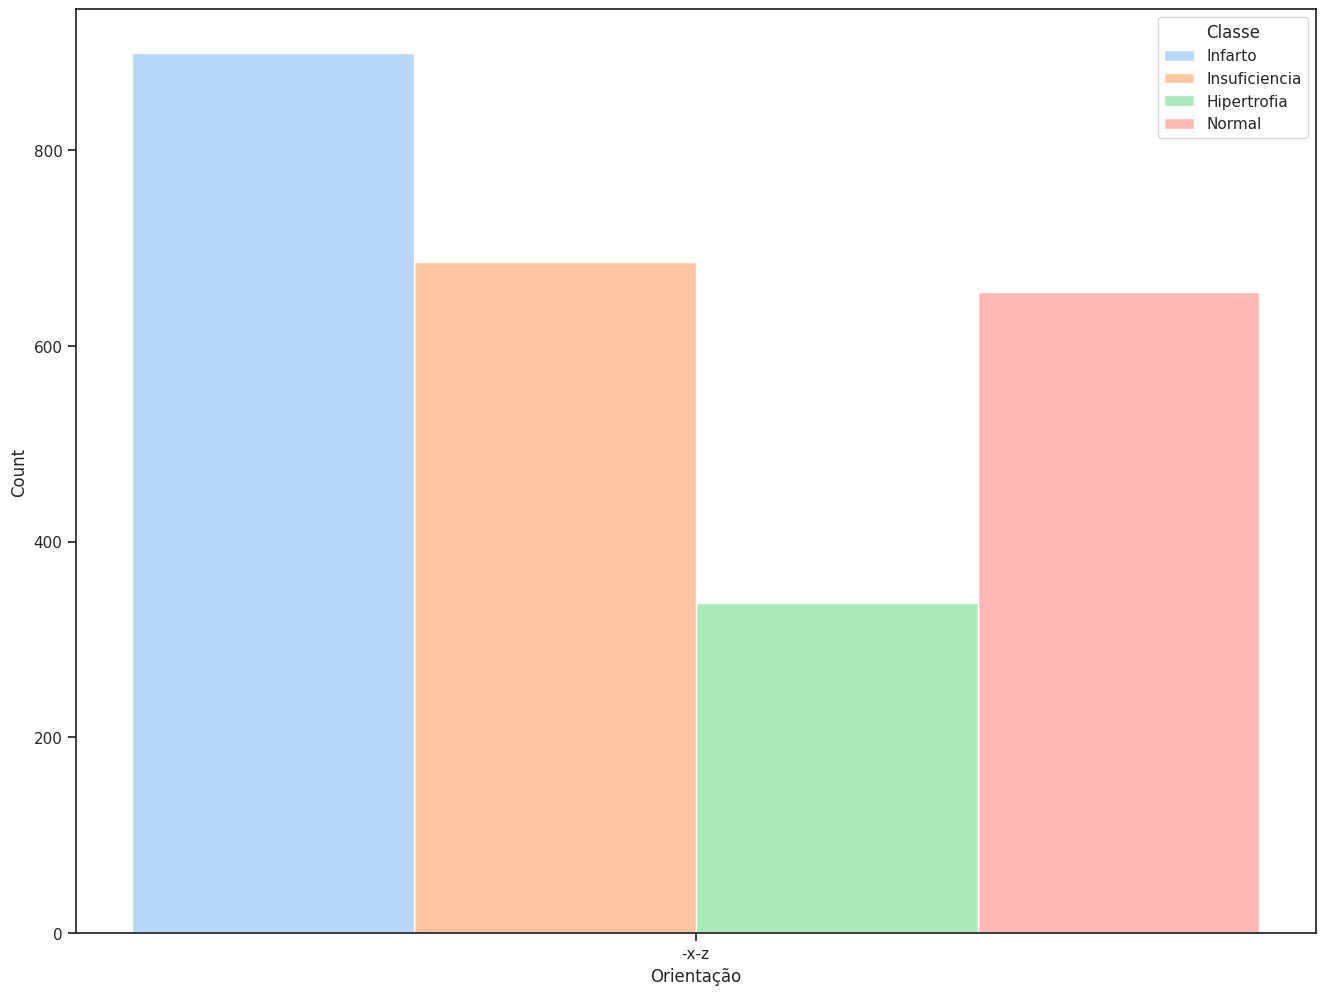

In [ ]:
plt.figure(figsize=(16,12))
sns.set(style="ticks", palette="pastel")
sns.histplot(x="Orientação", #y = "ID Paciente",
            #hue="Dimensão", palette=["m", "g", "b", "y"], showfliers=False,
            hue="Classe",
            #hue="Classe",
            multiple="dodge",
            shrink=.8,
            #cbar=True,
            data=df_fold2)

In [ ]:
#dataframe fold3 validação cruzada
df_fold3 = df_treino.loc[
    (df_treino['ID Paciente'].isin(fold3))
]

In [ ]:
df_fold3

,ID Paciente,Caminho das imagens,Nome das imagens,Orientação,Dimensão,Classe
10230,SCD0001101,/content/SCD0001101/1.392_29sSOG9riFiQfXpHFLC6...,CAP_SCD0001101_MR__hrt_raw_20120813121316425_4...,-x-z,256x256,Infarto
10231,SCD0001101,/content/SCD0001101/1.392_29sSOG9riFiQfXpHFLC6...,CAP_SCD0001101_MR__hrt_raw_20120813121316540_5...,-x-z,256x256,Infarto
10232,SCD0001101,/content/SCD0001101/1.392_29sSOG9riFiQfXpHFLC6...,CAP_SCD0001101_MR__hrt_raw_20120813121316503_5...,-x-z,256x256,Infarto
10233,SCD0001101,/content/SCD0001101/1.392_29sSOG9riFiQfXpHFLC6...,CAP_SCD0001101_MR__hrt_raw_20120813121316340_4...,-x-z,256x256,Infarto
10234,SCD0001101,/content/SCD0001101/1.392_29sSOG9riFiQfXpHFLC6...,CAP_SCD0001101_MR__hrt_raw_20120813121316391_4...,-x-z,256x256,Infarto
...,...,...,...,...,...,...
46517,SCD0004101,/content/SCD0004101/1.232_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004101_MR__hrt_raw_20120813123957601_9...,-x-z,256x256,Normal
46518,SCD0004101,/content/SCD0004101/1.232_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004101_MR__hrt_raw_20120813123957523_9...,-x-z,256x256,Normal
46519,SCD0004101,/content/SCD0004101/1.232_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004101_MR__hrt_raw_20120813123957675_1...,-x-z,256x256,Normal
46520,SCD0004101,/content/SCD0004101/1.232_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004101_MR__hrt_raw_20120813123957845_1...,-x-z,256x256,Normal


In [ ]:
df_fold3.to_csv('fold3.csv', index = False)

<Axes: xlabel='Orientação', ylabel='Count'>

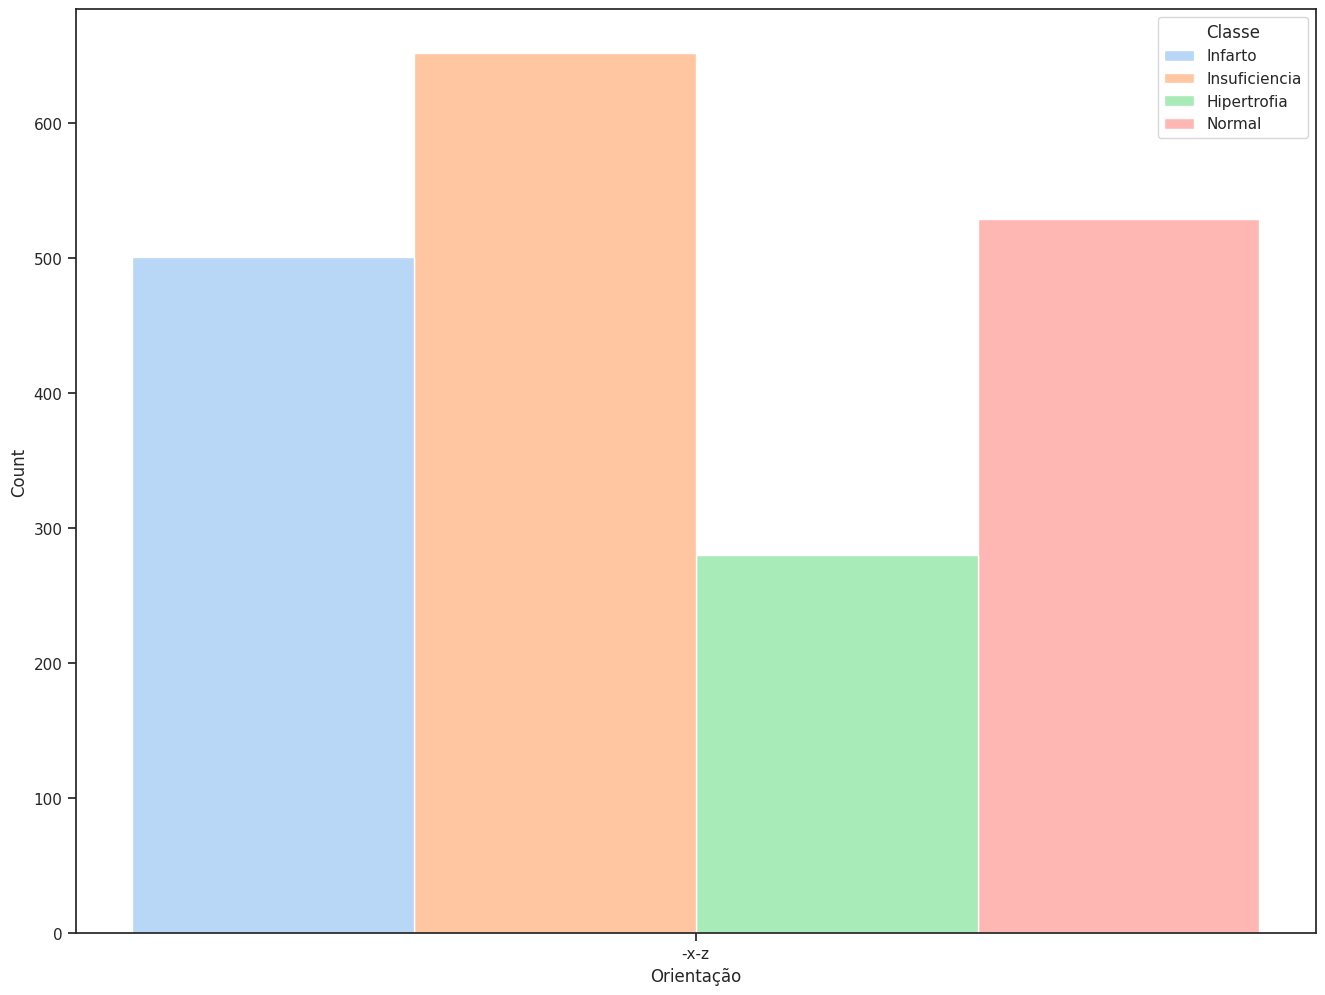

In [ ]:
plt.figure(figsize=(16,12))
sns.set(style="ticks", palette="pastel")
sns.histplot(x="Orientação", #y = "ID Paciente",
            #hue="Dimensão", palette=["m", "g", "b", "y"], showfliers=False,
            hue="Classe",
            #hue="Classe",
            multiple="dodge",
            shrink=.8,
            #cbar=True,
            data=df_fold3)

In [ ]:
#dataframe fold4 validação cruzada
df_fold4 = df_treino.loc[
    (df_treino['ID Paciente'].isin(fold4))
]


In [ ]:
df_fold4

,ID Paciente,Caminho das imagens,Nome das imagens,Orientação,Dimensão,Classe
1050,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120635347_1...,-x-z,256x256,Infarto
1051,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120635212_1...,-x-z,256x256,Infarto
1052,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120635184_1...,-x-z,256x256,Infarto
1053,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120635224_1...,-x-z,256x256,Infarto
1054,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120635240_1...,-x-z,256x256,Infarto
...,...,...,...,...,...,...
44166,SCD0003901,/content/SCD0003901/1.608_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0003901_MR__hrt_raw_20120813123811564_1...,-x-z,256x256,Normal
44171,SCD0003901,/content/SCD0003901/3.232_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0003901_MR__hrt_raw_20120813123822725_5...,-x-z,256x256,Normal
44177,SCD0003901,/content/SCD0003901/3.232_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0003901_MR__hrt_raw_20120813123822542_1...,-x-z,256x256,Normal
44178,SCD0003901,/content/SCD0003901/3.232_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0003901_MR__hrt_raw_20120813123822689_3...,-x-z,256x256,Normal


In [ ]:
df_fold4.to_csv('fold4.csv', index = False)

<Axes: xlabel='Orientação', ylabel='Count'>

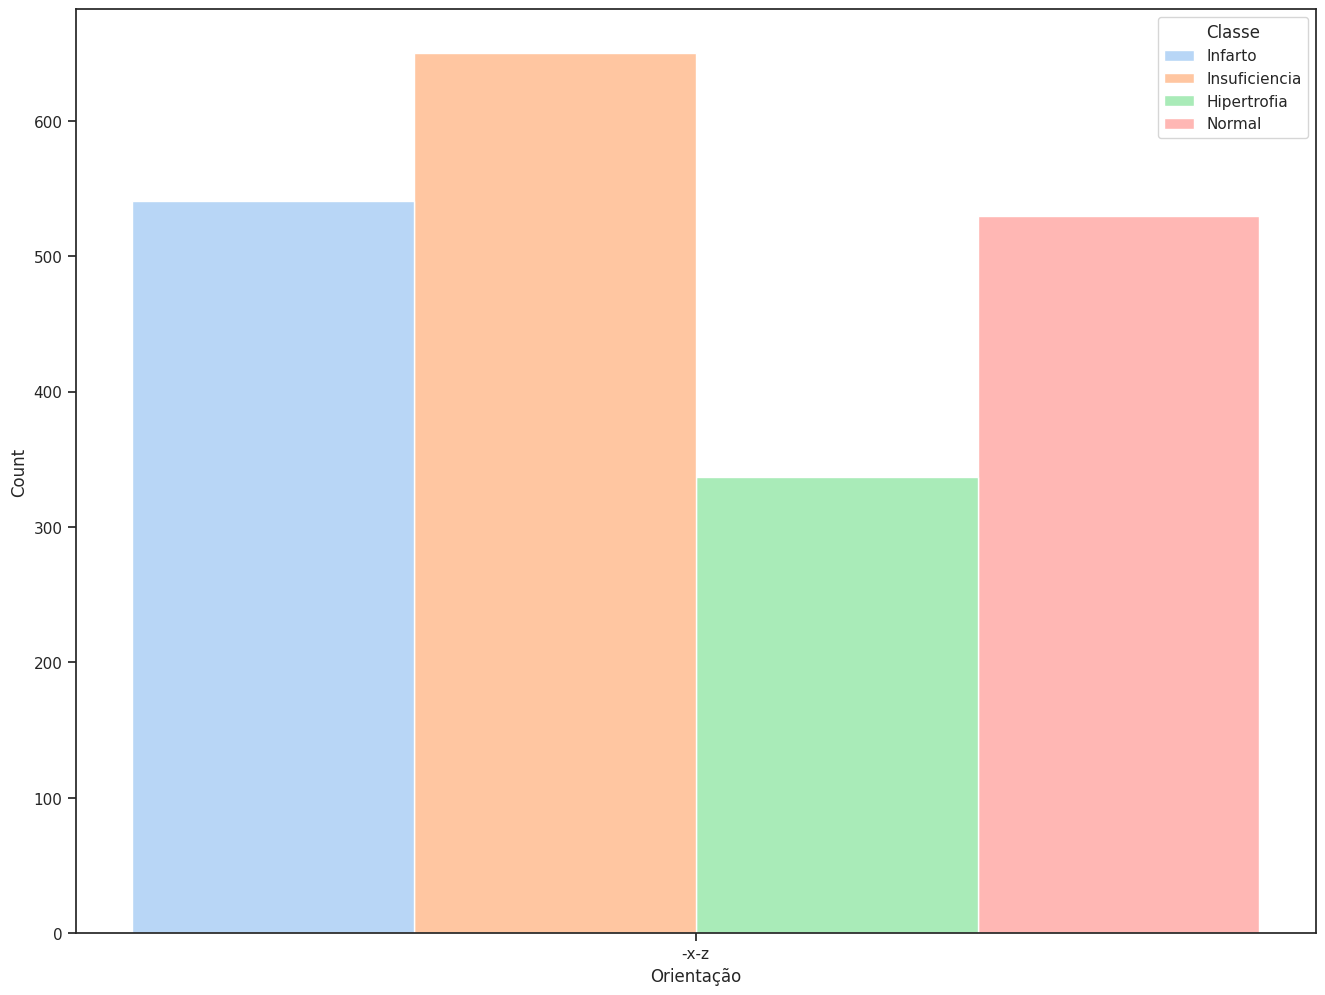

In [ ]:
plt.figure(figsize=(16,12))
sns.set(style="ticks", palette="pastel")
sns.histplot(x="Orientação", #y = "ID Paciente",
            #hue="Dimensão", palette=["m", "g", "b", "y"], showfliers=False,
            hue="Classe",
            #hue="Classe",
            multiple="dodge",
            shrink=.8,
            #cbar=True,
            data=df_fold4)

In [ ]:
#dataframe treino para o fold1 da validação cruzada
df_treino_fold1 = df_treino.loc[
    (~df_treino['ID Paciente'].isin(fold1))
]

df_treino_fold1

,ID Paciente,Caminho das imagens,Nome das imagens,Orientação,Dimensão,Classe
1050,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120635347_1...,-x-z,256x256,Infarto
1051,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120635212_1...,-x-z,256x256,Infarto
1052,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120635184_1...,-x-z,256x256,Infarto
1053,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120635224_1...,-x-z,256x256,Infarto
1054,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120635240_1...,-x-z,256x256,Infarto
...,...,...,...,...,...,...
50196,SCD0004401,/content/SCD0004401/1.632_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004401_MR__hrt_raw_20120813124228799_6...,-x-z,256x256,Normal
50197,SCD0004401,/content/SCD0004401/1.632_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004401_MR__hrt_raw_20120813124228903_1...,-x-z,256x256,Normal
50198,SCD0004401,/content/SCD0004401/1.632_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004401_MR__hrt_raw_20120813124229123_1...,-x-z,256x256,Normal
50199,SCD0004401,/content/SCD0004401/1.632_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004401_MR__hrt_raw_20120813124228738_3...,-x-z,256x256,Normal


In [ ]:
df_treino_fold1.to_csv('treino_fold1.csv', index = False)

<Axes: xlabel='Orientação', ylabel='Count'>

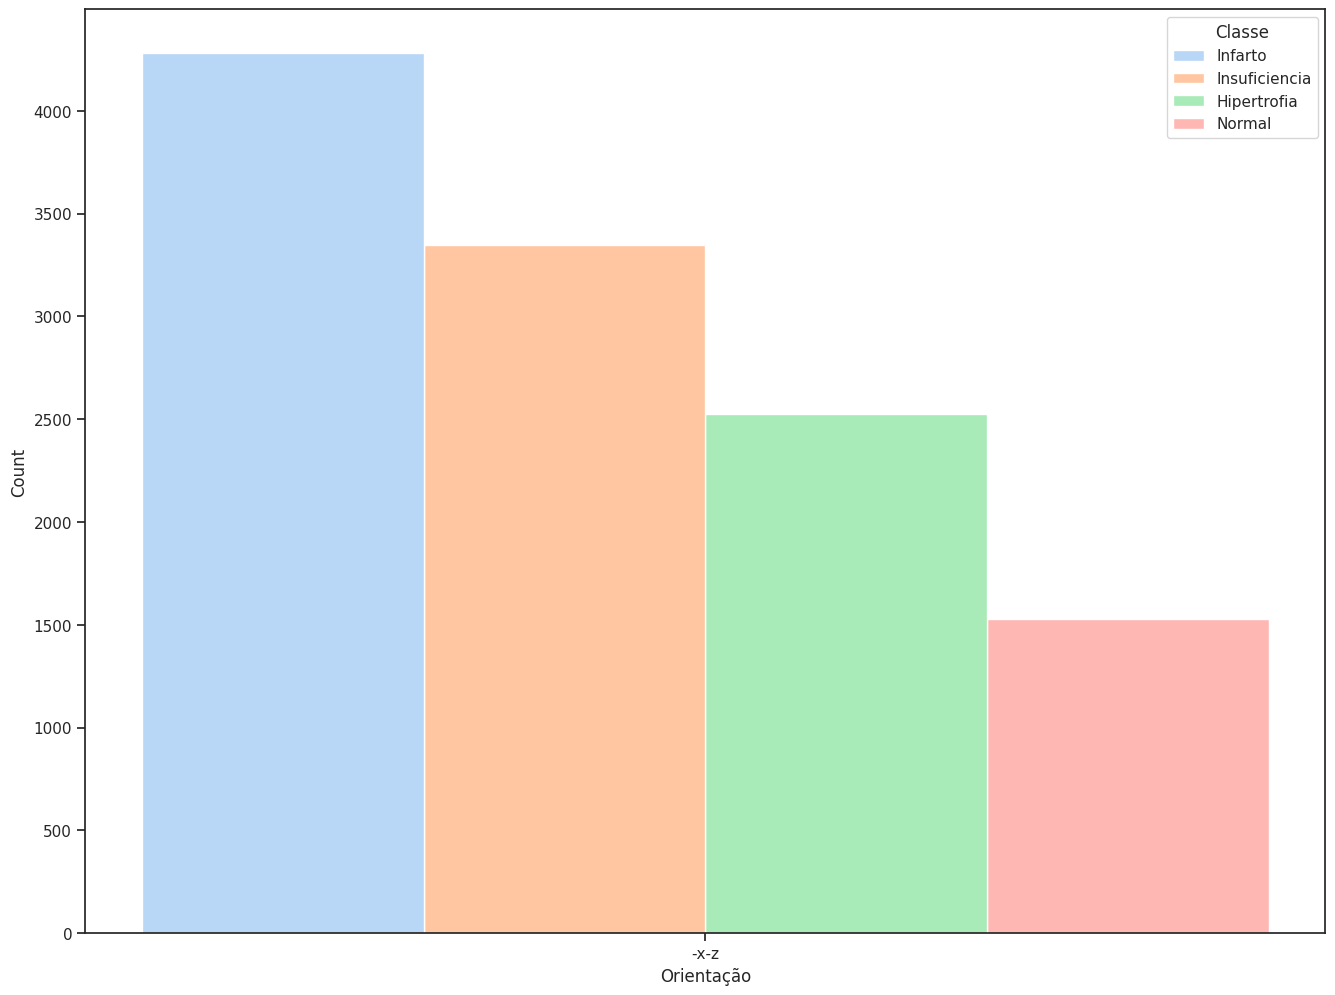

In [ ]:
plt.figure(figsize=(16,12))
sns.set(style="ticks", palette="pastel")
sns.histplot(x="Orientação", #y = "ID Paciente",
            #hue="Dimensão", palette=["m", "g", "b", "y"], showfliers=False,
            hue="Classe",
            #hue="Classe",
            multiple="dodge",
            shrink=.8,
            #cbar=True,
            data=df_treino_fold1)

In [ ]:
#dataframe de treino para fold2 da validação cruzada
df_treino_fold2 = df_treino.loc[
    (~df_treino['ID Paciente'].isin(fold2))
]

df_treino_fold2

,ID Paciente,Caminho das imagens,Nome das imagens,Orientação,Dimensão,Classe
1050,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120635347_1...,-x-z,256x256,Infarto
1051,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120635212_1...,-x-z,256x256,Infarto
1052,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120635184_1...,-x-z,256x256,Infarto
1053,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120635224_1...,-x-z,256x256,Infarto
1054,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120635240_1...,-x-z,256x256,Infarto
...,...,...,...,...,...,...
48505,SCD0004301,/content/SCD0004301/1.512_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004301_MR__hrt_raw_20120813124119757_1...,-x-z,256x256,Normal
48941,SCD0004301,/content/SCD0004301/1.512_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004301_MR__hrt_raw_20120813124119685_1...,-x-z,256x256,Normal
49091,SCD0004301,/content/SCD0004301/1.512_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004301_MR__hrt_raw_20120813124119632_1...,-x-z,256x256,Normal
49135,SCD0004301,/content/SCD0004301/1.512_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004301_MR__hrt_raw_20120813124119895_2...,-x-z,256x256,Normal


In [ ]:
df_treino_fold2.to_csv('treino_fold2.csv', index = False)

<Axes: xlabel='Orientação', ylabel='Count'>

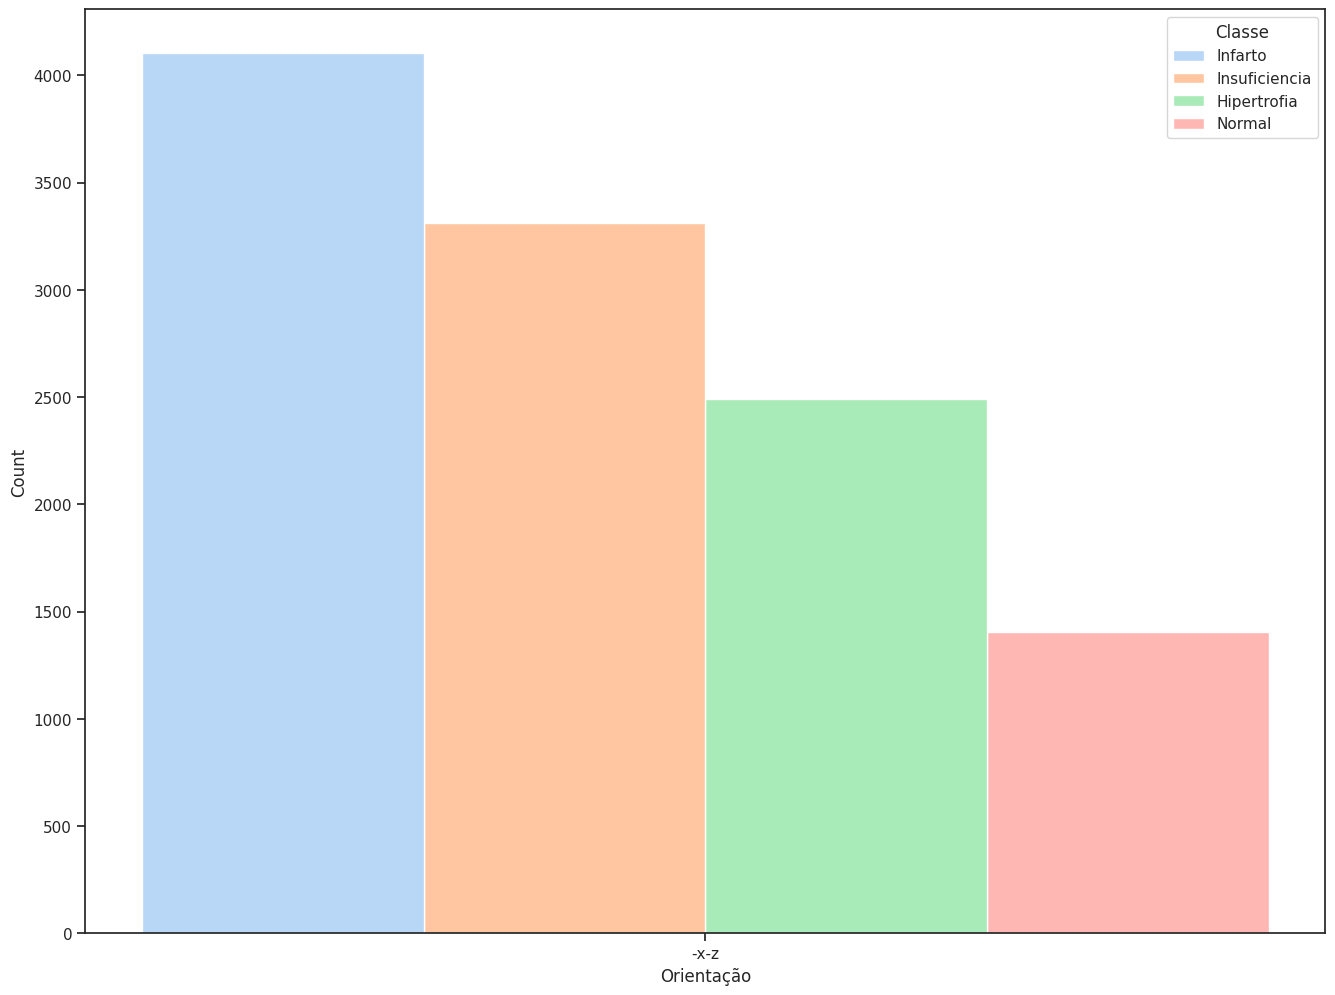

In [ ]:
plt.figure(figsize=(16,12))
sns.set(style="ticks", palette="pastel")
sns.histplot(x="Orientação", #y = "ID Paciente",
            #hue="Dimensão", palette=["m", "g", "b", "y"], showfliers=False,
            hue="Classe",
            #hue="Classe",
            multiple="dodge",
            shrink=.8,
            #cbar=True,
            data=df_treino_fold2)

In [ ]:
#dataframe de treino para fold3 da validação cruzada
df_treino_fold3 = df_treino.loc[
    (~df_treino['ID Paciente'].isin(fold3))
]

df_treino_fold3

,ID Paciente,Caminho das imagens,Nome das imagens,Orientação,Dimensão,Classe
1050,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120635347_1...,-x-z,256x256,Infarto
1051,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120635212_1...,-x-z,256x256,Infarto
1052,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120635184_1...,-x-z,256x256,Infarto
1053,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120635224_1...,-x-z,256x256,Infarto
1054,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120635240_1...,-x-z,256x256,Infarto
...,...,...,...,...,...,...
50196,SCD0004401,/content/SCD0004401/1.632_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004401_MR__hrt_raw_20120813124228799_6...,-x-z,256x256,Normal
50197,SCD0004401,/content/SCD0004401/1.632_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004401_MR__hrt_raw_20120813124228903_1...,-x-z,256x256,Normal
50198,SCD0004401,/content/SCD0004401/1.632_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004401_MR__hrt_raw_20120813124229123_1...,-x-z,256x256,Normal
50199,SCD0004401,/content/SCD0004401/1.632_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004401_MR__hrt_raw_20120813124228738_3...,-x-z,256x256,Normal


In [ ]:
df_treino_fold3.to_csv('treino_fold3.csv', index = False)

<Axes: xlabel='Orientação', ylabel='Count'>

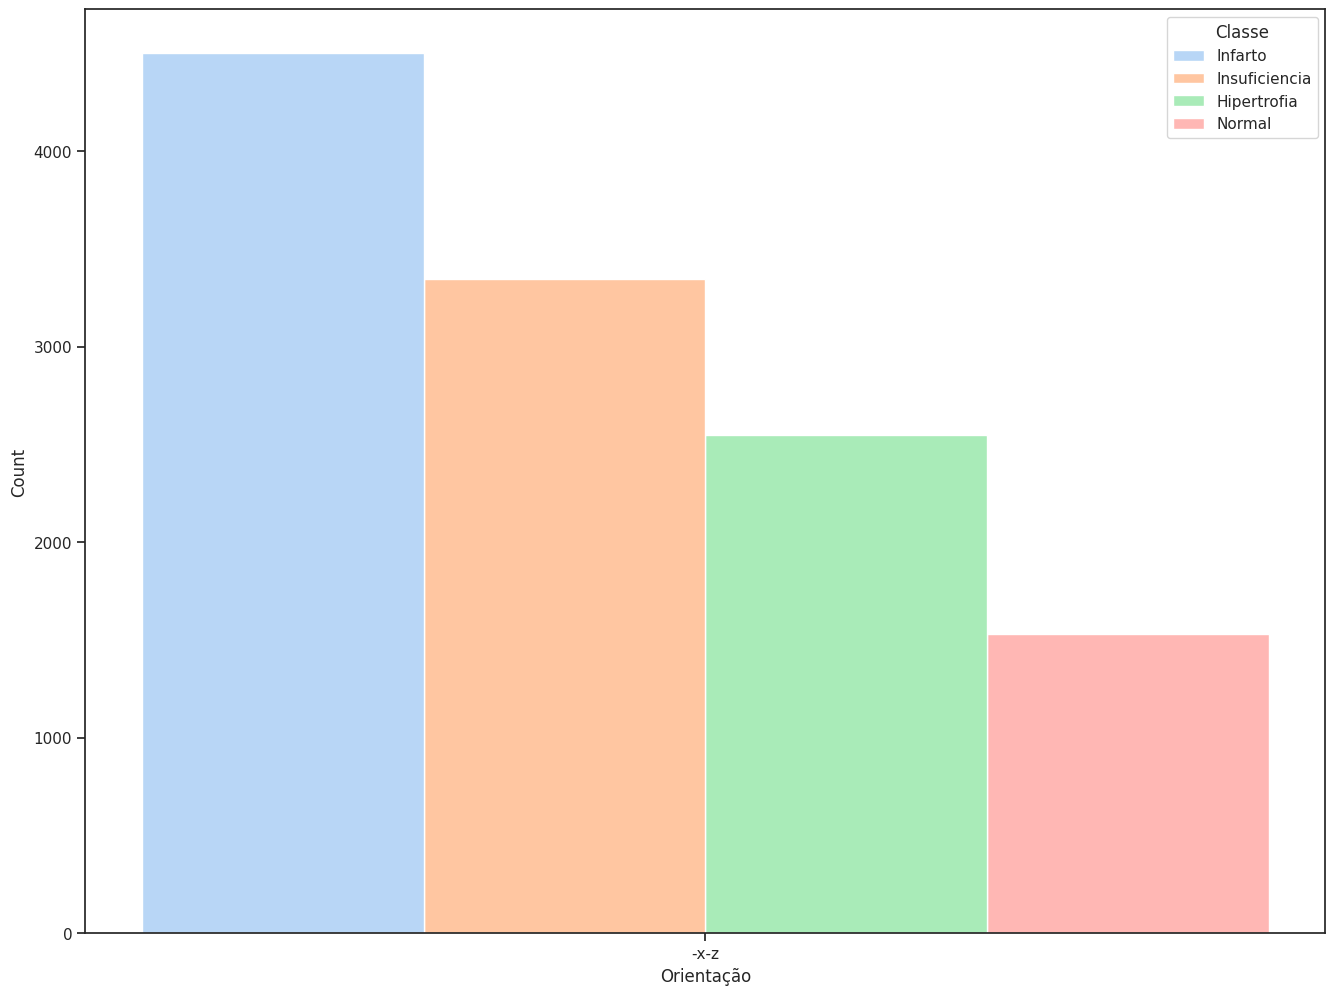

In [ ]:
plt.figure(figsize=(16,12))
sns.set(style="ticks", palette="pastel")
sns.histplot(x="Orientação", #y = "ID Paciente",
            #hue="Dimensão", palette=["m", "g", "b", "y"], showfliers=False,
            hue="Classe",
            #hue="Classe",
            multiple="dodge",
            shrink=.8,
            #cbar=True,
            data=df_treino_fold3)

In [ ]:
#dataframe de treino para fold4 da validação cruzada

df_treino_fold4 = df_treino.loc[
    (~df_treino['ID Paciente'].isin(fold4))
]

df_treino_fold4

,ID Paciente,Caminho das imagens,Nome das imagens,Orientação,Dimensão,Classe
1945,SCD0000301,/content/SCD0000301/2.592_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0000301_MR__hrt_raw_20120813120704733_6...,-x-z,256x256,Infarto
1946,SCD0000301,/content/SCD0000301/1.676_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0000301_MR__hrt_raw_20120813120704055_1...,-x-z,256x256,Infarto
1947,SCD0000301,/content/SCD0000301/1.676_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0000301_MR__hrt_raw_20120813120703873_1...,-x-z,256x256,Infarto
1948,SCD0000301,/content/SCD0000301/1.676_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0000301_MR__hrt_raw_20120813120703984_1...,-x-z,256x256,Infarto
1949,SCD0000301,/content/SCD0000301/1.676_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0000301_MR__hrt_raw_20120813120703790_1...,-x-z,256x256,Infarto
...,...,...,...,...,...,...
50196,SCD0004401,/content/SCD0004401/1.632_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004401_MR__hrt_raw_20120813124228799_6...,-x-z,256x256,Normal
50197,SCD0004401,/content/SCD0004401/1.632_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004401_MR__hrt_raw_20120813124228903_1...,-x-z,256x256,Normal
50198,SCD0004401,/content/SCD0004401/1.632_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004401_MR__hrt_raw_20120813124229123_1...,-x-z,256x256,Normal
50199,SCD0004401,/content/SCD0004401/1.632_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004401_MR__hrt_raw_20120813124228738_3...,-x-z,256x256,Normal


In [ ]:
df_treino_fold4.to_csv('treino_fold4.csv', index = False)

<Axes: xlabel='Orientação', ylabel='Count'>

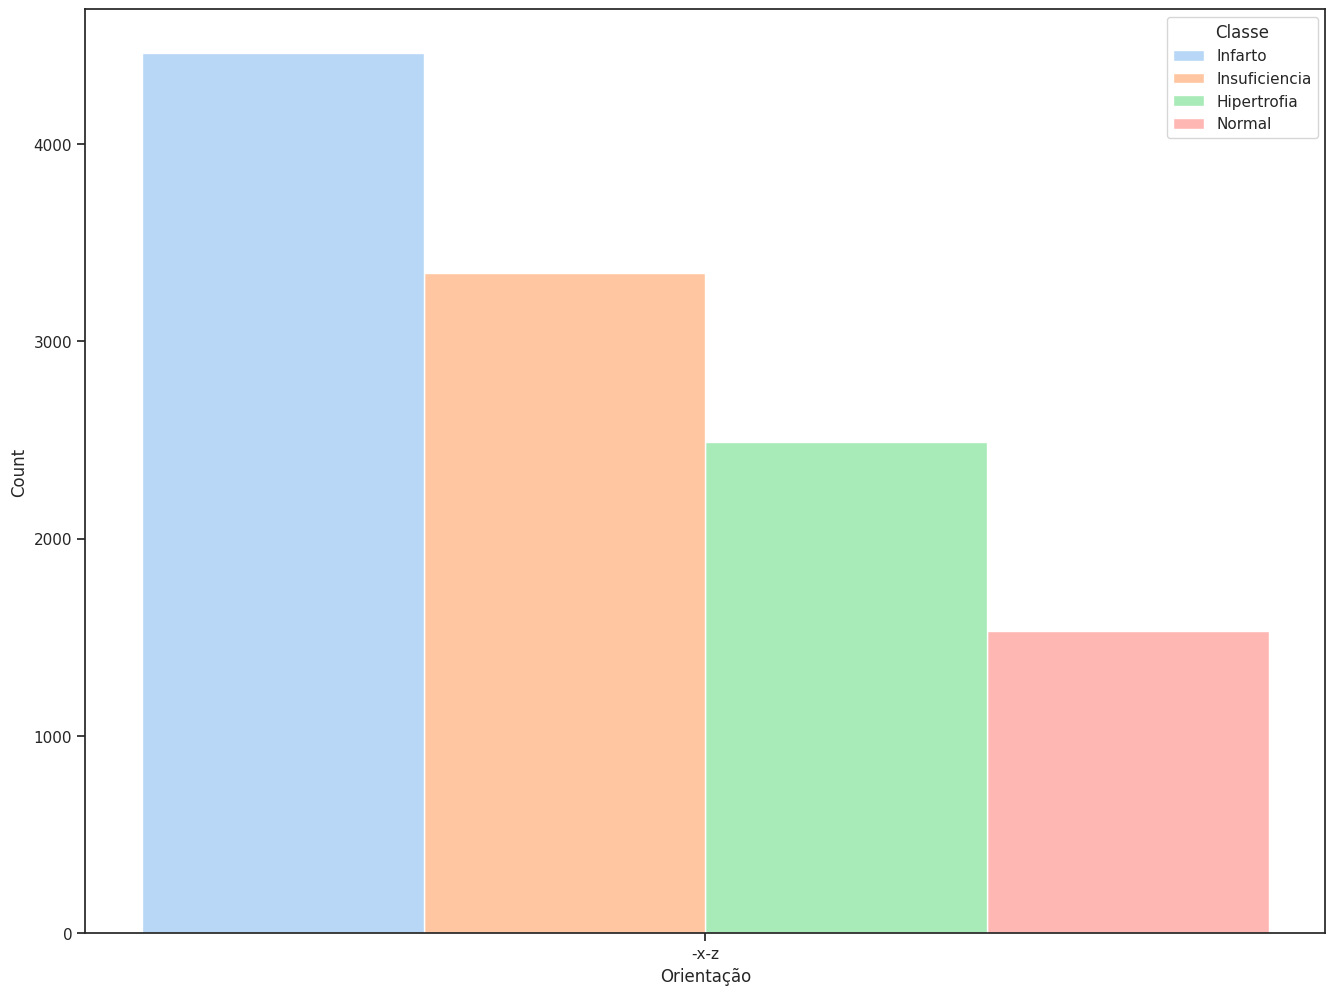

In [ ]:
plt.figure(figsize=(16,12))
sns.set(style="ticks", palette="pastel")
sns.histplot(x="Orientação", #y = "ID Paciente",
            #hue="Dimensão", palette=["m", "g", "b", "y"], showfliers=False,
            hue="Classe",
            #hue="Classe",
            multiple="dodge",
            shrink=.8,
            #cbar=True,
            data=df_treino_fold4)

In [ ]:
#acessando as imagens.dcm de todos os pacientes e salvando em .png no diretorio de treino na sua respectiva classe.

for i in range(len(df_treino)):
    imagens = df_treino.iloc[i]['Caminho das imagens']
    nome_imagens = df_treino.iloc[i]['Nome das imagens']
    classe = df_treino.iloc[i]['Classe']
    dcm = pydicom.dcmread(imagens)
    pixels = dcm.pixel_array #pegando os pixels das imagens
    cinza = np.uint8(pixels / np.max(pixels) * 255) #aplicando escala cinza na imagem
    #convertendo em as imagens em .pgn e salvando no diretorio do dataset e respectiva doença
    image = Image.fromarray(cinza)
    png_nome = os.path.splitext(nome_imagens)[0] + ".png"
    png_endereco = os.path.join(dataset_path1,classe,png_nome)
    image.save(png_endereco)

In [ ]:
#acessando as imagens.dcm de todos os pacientes e salvando em .png no diretorio de teste de acordo com sua respectiva classe.

for i in range(len(df_teste)):
    imagens = df_teste.iloc[i]['Caminho das imagens']
    nome_imagens = df_teste.iloc[i]['Nome das imagens']
    classe = df_teste.iloc[i]['Classe']
    pixels = dcm.pixel_array #pegando os pixels das imagens
    cinza = np.uint8(pixels / np.max(pixels) * 255) #aplicando escala cinza na imagem
    #convertendo em as imagens em .pgn e salvando no diretorio do dataset e respectiva doença
    image = Image.fromarray(cinza)
    png_nome = os.path.splitext(nome_imagens)[0] + ".png"
    png_endereco = os.path.join(dataset_path2,classe,png_nome)
    image.save(png_endereco)

In [ ]:


#acessando as imagens.dcm de todos os pacientes infartados e salvando em .png no diretorio de treino.
#for infartados in pacientes[infarto_index]:
  #pacientes_infartados = os.listdir(os.path.join(datapath1,infartados))
  #for img_infarto in pacientes_infartados:
    #img_pacientes_inf = os.listdir(os.path.join(datapath1,infartados,img_infarto))
    #for nome_arquivo_inf in img_pacientes_inf:
      #if nome_arquivo_inf.endswith(".dcm"):
        #endereco_arquivo_inf = os.path.join(datapath1,infartados,img_infarto,nome_arquivo_inf)
        #dcm = pydicom.dcmread(endereco_arquivo_inf) #lendo as imagens .dcm (DICOM)
        #image_inf = dcm.pixel_array #pegando os pixels das imagens
        #cinza = np.uint8(image_inf / np.max(image_inf) * 255) #aplicando escala cinza na imagem
        #convertendo em as imagens em .pgn e salvando no diretorio do dataset e respectiva doença
        #image_inf = Image.fromarray(cinza)
        #png_nome_inf = os.path.splitext(nome_arquivo_inf)[0] + ".png"
        #png_endereco_inf = os.path.join(dataset_path1,'Infarto',png_nome_inf)
        #image_inf.save(png_endereco_inf)
        #print(png_endereco_inf)

In [ ]:
#acessando as imagens.dcm de todos os pacientes infartados e salvando em .png no diretorio de teste.
#for infartados in pacientes[infarto_index[:1]]:
  #pacientes_infartados = os.listdir(os.path.join(datapath1,infartados))
  #for img_infarto in pacientes_infartados:
    #img_pacientes_inf = os.listdir(os.path.join(datapath1,infartados,img_infarto))
    #for nome_arquivo_inf in img_pacientes_inf:
      #if nome_arquivo_inf.endswith(".dcm"):
        #endereco_arquivo_inf = os.path.join(datapath1,infartados,img_infarto,nome_arquivo_inf)
        #dcm = pydicom.dcmread(endereco_arquivo_inf) #lendo as imagens .dcm (DICOM)
        #image_inf = dcm.pixel_array #pegando os pixels das imagens
        #cinza = np.uint8(image_inf / np.max(image_inf) * 255) #aplicando escala cinza na imagem
        #convertendo em as imagens em .pgn e salvando no diretorio do dataset e respectiva doença
        #image_inf = Image.fromarray(cinza)
        #png_nome_inf = os.path.splitext(nome_arquivo_inf)[0] + ".png"
        #png_endereco_inf = os.path.join(dataset_path2,'Infarto',png_nome_inf)
        #image_inf.save(png_endereco_inf)
        #print(png_endereco_inf)

In [ ]:
#acessando as imagens.dcm de todos os pacientes com insuficiencia cardiaca e salvando em .png no diretorio de treino.
#for insuficientes in pacientes[insuficiencia_index[1:]]:
  #pacientes_insuficientes = os.listdir(os.path.join(datapath1,insuficientes))
  #for img_insuficiencia in pacientes_insuficientes:
    #img_pacientes_ins = os.listdir(os.path.join(datapath1,insuficientes,img_insuficiencia))
    #for nome_arquivos_ins in img_pacientes_ins:
      #if nome_arquivos_ins.endswith(".dcm"):
        #endereco_arquivo_ins = os.path.join(datapath1,insuficientes,img_insuficiencia,nome_arquivos_ins)
        #dcm =pydicom.dcmread(endereco_arquivo_ins)
        #image_ins = dcm.pixel_array
        #cinza = np.uint8(image_ins / np.max(image_ins) * 255)
        #image_ins = Image.fromarray(cinza)
        #png_nome_ins = os.path.splitext(nome_arquivos_ins)[0] + ".png"
        #png_endereco_ins = os.path.join(dataset_path1,'Insuficiencia',png_nome_ins)
        #image_ins.save(png_endereco_ins)
        #print(png_endereco_ins)



In [ ]:
#acessando as imagens.dcm de todos os pacientes com insuficiencia cardiaca e salvando em .png no diretorio do teste.
#for insuficientes in pacientes[insuficiencia_index[:1]]:
  #pacientes_insuficientes = os.listdir(os.path.join(datapath1,insuficientes))
  #for img_insuficiencia in pacientes_insuficientes:
    #img_pacientes_ins = os.listdir(os.path.join(datapath1,insuficientes,img_insuficiencia))
    #for nome_arquivos_ins in img_pacientes_ins:
      #if nome_arquivos_ins.endswith(".dcm"):
        #endereco_arquivo_ins = os.path.join(datapath1,insuficientes,img_insuficiencia,nome_arquivos_ins)
        #dcm =pydicom.dcmread(endereco_arquivo_ins)
        #image_ins = dcm.pixel_array
        #cinza = np.uint8(image_ins / np.max(image_ins) * 255)
        #image_ins = Image.fromarray(cinza)
        #png_nome_ins = os.path.splitext(nome_arquivos_ins)[0] + ".png"
        #png_endereco_ins = os.path.join(dataset_path2,'Insuficiencia',png_nome_ins)
        #image_ins.save(png_endereco_ins)
        #print(png_endereco_ins)


In [ ]:
#acessando as imagens .dcm de todos os pacientes com hipertrofia no ventriculo e salvando em .png no diretorio do treino.
#for hipertrofia_vent in pacientes[hipertrofia_index[1:]]:
  #pacientes_hipertrofia = os.listdir(os.path.join(datapath1,hipertrofia_vent))
  #for img_hipertrofia in pacientes_hipertrofia:
    #img_pacientes_hip = os.listdir(os.path.join(datapath1,hipertrofia_vent,img_hipertrofia))
    #for nome_arquivos_hip in img_pacientes_hip:
      #if nome_arquivos_hip.endswith(".dcm"):
        #endereco_arquivo_hip = os.path.join(datapath1,hipertrofia_vent,img_hipertrofia,nome_arquivos_hip)
        #dcm = pydicom.dcmread(endereco_arquivo_hip)
        #image_hip = dcm.pixel_array
        #cinza = np.uint8(image_hip / np.max(image_hip) * 255)
        #image_hip = Image.fromarray(cinza)
        #png_nome_hip = os.path.splitext(nome_arquivos_hip)[0] + ".png"
        #png_endereco_hip = os.path.join(dataset_path1,'Hipertrofia',png_nome_hip)
        #image_hip.save(png_endereco_hip)
        #print(png_endereco_hip)


In [ ]:
#acessando as imagens .dcm de todos os pacientes com hipertrofia no ventriculo e salvando em .png no diretorio do treino.
#for hipertrofia_vent in pacientes[hipertrofia_index[:1]]:
  #pacientes_hipertrofia = os.listdir(os.path.join(datapath1,hipertrofia_vent))
  #for img_hipertrofia in pacientes_hipertrofia:
    #img_pacientes_hip = os.listdir(os.path.join(datapath1,hipertrofia_vent,img_hipertrofia))
    #for nome_arquivos_hip in img_pacientes_hip:
      #if nome_arquivos_hip.endswith(".dcm"):
        #endereco_arquivo_hip = os.path.join(datapath1,hipertrofia_vent,img_hipertrofia,nome_arquivos_hip)
        #dcm = pydicom.dcmread(endereco_arquivo_hip)
        #image_hip = dcm.pixel_array
        #cinza = np.uint8(image_hip / np.max(image_hip) * 255)
        #image_hip = Image.fromarray(cinza)
        #png_nome_hip = os.path.splitext(nome_arquivos_hip)[0] + ".png"
        #png_endereco_hip = os.path.join(dataset_path2,'Hipertrofia',png_nome_hip)
        #image_hip.save(png_endereco_hip)
        #print(png_endereco_hip)

In [ ]:
#acessando as imagens de todos os pacientes normais e salvando no diretorio do treino.
#for normais in pacientes[normal_index[1:]]:
  #pacientes_normais = os.listdir(os.path.join(datapath1,normais))
  #for img_normais in pacientes_normais:
    #img_pacientes_normais = os.listdir(os.path.join(datapath1,normais,img_normais))
    #for nome_arquivos_normais in img_pacientes_normais:
      #if nome_arquivos_normais.endswith(".dcm"):
        #endereco_arquivo_normais = os.path.join(datapath1,normais,img_normais,nome_arquivos_normais)
        #dcm = pydicom.dcmread(endereco_arquivo_normais)
        #image_normais = dcm.pixel_array
        #cinza = np.uint8(image_normais / np.max(image_normais) * 255)
        #image_normais = Image.fromarray(cinza)
        #png_nomes = os.path.splitext(nome_arquivos_normais)[0] + ".png"
        #png_endereco = os.path.join(dataset_path1,'Normal',png_nomes)
        #image_normais.save(png_endereco)

        #print(png_endereco)

In [ ]:
#acessando as imagens de todos os pacientes normais e salvando no diretorio do teste.
#for normais in pacientes[normal_index[:1]]:
  #pacientes_normais = os.listdir(os.path.join(datapath1,normais))
  #for img_normais in pacientes_normais:
    #img_pacientes_normais = os.listdir(os.path.join(datapath1,normais,img_normais))
    #for nome_arquivos_normais in img_pacientes_normais:
      #if nome_arquivos_normais.endswith(".dcm"):
        #endereco_arquivo_normais = os.path.join(datapath1,normais,img_normais,nome_arquivos_normais)
        #dcm = pydicom.dcmread(endereco_arquivo_normais)
        #image_normais = dcm.pixel_array
        #cinza = np.uint8(image_normais / np.max(image_normais) * 255)
        #image_normais = Image.fromarray(cinza)
        #png_nomes = os.path.splitext(nome_arquivos_normais)[0] + ".png"
        #png_endereco = os.path.join(dataset_path2,'Normal',png_nomes)
        #image_normais.save(png_endereco)

        #print(png_endereco)

In [ ]:
print(len(os.listdir(os.path.join('treino','Infarto'))))

4320


In [ ]:
print(len(os.listdir(os.path.join('validacao','Infarto'))))

722


In [ ]:
print(len(os.listdir(os.path.join('teste','Infarto'))))

546


In [ ]:
print(len(os.listdir(os.path.join('treino','Insuficiencia'))))

2889


In [ ]:
print(len(os.listdir(os.path.join('validacao','Insuficiencia'))))

752


In [ ]:
print(len(os.listdir(os.path.join('teste','Insuficiencia'))))

1302


In [ ]:
print(len(os.listdir(os.path.join('treino','Hipertrofia'))))

In [ ]:
print(len(os.listdir(os.path.join('validacao','Hipertrofia'))))

In [ ]:
print(len(os.listdir(os.path.join('teste','Hipertrofia'))))

In [ ]:
print(len(os.listdir(os.path.join('treino','Normal'))))

1981


In [ ]:
print(len(os.listdir(os.path.join('validacao','Normal'))))

7


In [ ]:
print(len(os.listdir(os.path.join('teste','Normal'))))

734


## Processamento do Conjunto de Dados

In [ ]:
endereco_dataset = 'treino'
categorias = os.listdir(endereco_dataset)
rotulos = [i for i in range(len(categorias))] #Compreensão de lista - rotulando as doenças

rotulo_dir = dict(zip(categorias,rotulos))

print(rotulo_dir)
print(categorias)
print(rotulos)

{'Insuficiencia': 0, 'Hipertrofia': 1, 'Normal': 2, 'Infarto': 3}
['Insuficiencia', 'Hipertrofia', 'Normal', 'Infarto']
[0, 1, 2, 3]


In [ ]:
endereco_dataset2 = 'validacao'
categorias2 = os.listdir(endereco_dataset2)
rotulos2 = [i for i in range(len(categorias2))] #Compreensão de lista - rotulando as doenças

rotulo_dir2 = dict(zip(categorias2,rotulos2))

print(rotulo_dir2)
print(categorias2)
print(rotulos2)

{'Insuficiencia': 0, 'Normal': 1, 'Infarto': 2}
['Insuficiencia', 'Normal', 'Infarto']
[0, 1, 2]


In [ ]:
endereco_dataset1 = 'teste'
categorias1 = os.listdir(endereco_dataset1)
rotulos1 = [i for i in range(len(categorias1))] #Compreensão de lista - rotulando as doenças

rotulo_dir1 = dict(zip(categorias1,rotulos1))

print(rotulo_dir1)
print(categorias1)
print(rotulos1)

{'Insuficiencia': 0, 'Hipertrofia': 1, 'Normal': 2, 'Infarto': 3}
['Insuficiencia', 'Hipertrofia', 'Normal', 'Infarto']
[0, 1, 2, 3]


In [ ]:
tam_img = 256
data_treino=[]
target_treino=[]

#listando o nome das imagens de cada categoria.
for categoria in categorias:
  end_pastas = os.path.join(endereco_dataset,categoria)
  nome_imgs = os.listdir(end_pastas)

  #buscando o nome de cada imagem de cada categoria
  for nome_img in nome_imgs:
    end_imgs = os.path.join (end_pastas,nome_img)
    imagens = cv2.imread(end_imgs)

    try:
      #img_redimen = cv2.resize(imagens,(tam_img,tam_img)) #redimensionando as imagens para tam_img para padronizar o dataset
      gray_image = cv2.cvtColor(imagens, cv2.COLOR_BGR2GRAY)
      data_treino.append(gray_image) #salvando na lista as imagens redimensionada
      target_treino.append(rotulo_dir[categoria]) #rotulando as imagens de acordo com as classes

    except Exception as e:
      print('excecao:',e) #em caso de excecao passara para a proxima imagem

In [ ]:
data_val=[]
target_val=[]

#listando o nome das imagens de cada categoria.
for categoria in categorias2:
  end_pastas = os.path.join(endereco_dataset2,categoria)
  nome_imgs = os.listdir(end_pastas)

  #buscando o nome de cada imagem de cada categoria
  for nome_img in nome_imgs:
    end_imgs = os.path.join (end_pastas,nome_img)
    imagens = cv2.imread(end_imgs)

    try:
      #img_redimen = cv2.resize(imagens,(tam_img,tam_img)) #redimensionando as imagens para 256x256 para padronizar o dataset
      gray_image = cv2.cvtColor(imagens, cv2.COLOR_BGR2GRAY)
      data_val.append(gray_image) #salvando na lista as imagens redimensionada
      target_val.append(rotulo_dir2[categoria]) #rotulando as imagens de acordo com as classes

    except Exception as e:
      print('excecao:',e) #em caso de excecao passara para a proxima imagem

In [ ]:

data_teste=[]
target_teste=[]

#listando o nome das imagens de cada categoria.
for categoria in categorias1:
  end_pastas = os.path.join(endereco_dataset1,categoria)
  nome_imgs = os.listdir(end_pastas)

  #buscando o nome de cada imagem de cada categoria
  for nome_img in nome_imgs:
    end_imgs = os.path.join (end_pastas,nome_img)
    imagens = cv2.imread(end_imgs)

    try:
      #img_redimen = cv2.resize(imagens,(tam_img,tam_img)) #redimensionando as imagens para 256x256 para padronizar o dataset
      gray_image = cv2.cvtColor(imagens, cv2.COLOR_BGR2GRAY)
      data_teste.append(gray_image) #salvando na lista as imagens redimensionada
      target_teste.append(rotulo_dir1[categoria]) #rotulando as imagens de acordo com as classes

    except Exception as e:
      print('excecao:',e) #em caso de excecao passara para a proxima imagem

In [ ]:
gray_image.shape

(256, 256)

In [ ]:
data_treino = np.array(data_treino)
data_treino = np.reshape(data_treino, (data_treino.shape[0],tam_img,tam_img,1)) #corrigindo a dimensão da imagem pra 256x256x1
target_treino = np.array(target_treino)



target_train = np_utils.to_categorical(target_treino)

In [ ]:
data_val = np.array(data_val)
data_val = np.reshape(data_val, (data_val.shape[0],tam_img,tam_img,1)) #corrigindo a dimensão da imagem pra 256x256x1
target_val = np.array(target_val)



target_vali = np_utils.to_categorical(target_val)

In [ ]:
data_teste = np.array(data_teste)
data_teste = np.reshape(data_teste, (data_teste.shape[0],tam_img,tam_img,1)) #corrigindo a dimensão da imagem pra 256x256x1
target_teste = np.array(target_teste)



target_test = np_utils.to_categorical(target_teste)

In [ ]:
np.save('data_train',data_treino)
np.save('target_train',target_train)

In [ ]:
np.save('data_val',data_val)
np.save('target_val',target_vali)

In [ ]:
np.save('data_test',data_teste)
np.save('target_test',target_test)

In [ ]:
!ls -lht data_train.npy

-rw-r--r-- 1 root root 742M Jul 17 19:20 data_train.npy


In [ ]:
data_treino[:].shape

(9190, 256, 256, 1)

In [ ]:
target_train.shape

(9190, 3)

In [ ]:
data_val[:].shape

(1481, 256, 256, 1)

In [ ]:
target_vali.shape

(1481, 3)

In [ ]:
data_teste[:].shape

(2582, 256, 256, 1)

In [ ]:
target_test.shape

(2582, 3)

# Modelo + Treinamento

In [ ]:
data_train = np.load('data_train.npy')
target_train = np.load('target_train.npy')


data_test= np.load('data_test.npy')
target_test = np.load('target_test.npy')

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
metricasEscolhidas = [CategoricalAccuracy(name='acc'),
                      AUC(name='auc'),
                      Precision(name='precision'),
                      Recall(name='recall')]

In [ ]:
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
# import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Input, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalAvgPool2D, AveragePooling2D
from keras.layers import add as keraslayersadd
from keras.regularizers import l2
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from tensorflow.keras.utils import plot_model

In [ ]:
"""ResNet15 model for Keras.

# Reference:

- [Deep Residual Learning for Image Recognition](
    https://arxiv.org/abs/1512.03385) (CVPR 2016 Best Paper Award)

Adapted from code contributed by BigMoyan.
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import warnings

from keras import models
from keras import layers
from keras.regularizers import l2

def identity_block(input_tensor, kernel_size, filters, stage, block, dilation):
    """The identity block is the block that has no conv layer at shortcut.

    # Arguments
        input_tensor: input tensor
        kernel_size: default 3, the kernel size of
            middle conv layer at main path
        filters: list of integers, the filters of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names

    # Returns
        Output tensor for the block.
    """
    filters1, filters2, filters3 = filters
    bn_axis = 3
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = layers.Conv2D(filters1, kernel_size,
                      padding='same',
                      dilation_rate=(int(2**(dilation // 3)),int(2**(dilation // 3))),
                      use_bias=False,
                      activation='relu',
                      kernel_regularizer=l2(1e-5),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2a')(input_tensor)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)

    x = layers.Conv2D(filters2, kernel_size,
                      padding='same',
                      dilation_rate=(int(2**((dilation+1) // 3)),int(2**((dilation+1) // 3))),
                      use_bias=False,
                      activation='relu',
                      kernel_regularizer=l2(1e-5),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2b')(x)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)

    x = layers.add([x, input_tensor])
    return x


def ResNet15Dilation(include_top=True,
             input_tensor=None,
             input_shape=(256,256,1),
             pooling=None,
             classes=3,
             **kwargs):
    """Instantiates the ResNet50 architecture.

    # Returns
        A Keras model instance.

    # Raises
        ValueError: in case of invalid argument for `weights`,
            or invalid input shape.
    """
    global backend, layers, models, keras_utils

    img_input = layers.Input(shape=input_shape)
    bn_axis = 3

    # x = layers.Conv2D(1, (49, 49),
    #                   strides=(1, 1),
    #                   # padding='valid',
    #                   padding='same',
    #                   activation=None,
    #                   kernel_regularizer=l2(1e-5),
    #                   kernel_initializer='he_normal',
    #                   name='conv_combLin')(img_input)

    x = layers.Conv2D(16, (3, 3),
                      strides=(1, 1),
                      # padding='valid',
                      padding='same',
                      activation='relu',
                      kernel_regularizer=l2(1e-5),
                      kernel_initializer='he_normal',
                      name='conv1')(img_input)
    # x = layers.MaxPooling2D((3, 3), strides=(1, 1))(x)

    x = identity_block(x, 3, [16, 16, 16], stage=1, block='a', dilation=1)
    #x = identity_block(x, 3, [45, 45, 45], stage=2, block='b', dilation=3)
    #x = identity_block(x, 3, [45, 45, 45], stage=3, block='c', dilation=5)
    #x = identity_block(x, 3, [45, 45, 45], stage=4, block='d', dilation=7)
    #x = identity_block(x, 3, [45, 45, 45], stage=5, block='e', dilation=9)
    #x = identity_block(x, 3, [45, 45, 45], stage=6, block='f', dilation=11)

    if include_top:
        x = layers.Conv2D(16, (3, 3),
                          strides=(1, 1),
                          dilation_rate=(16,16),
                          padding='same',
                          activation='relu',
                          kernel_regularizer=l2(1e-5),
                          kernel_initializer='he_normal',
                          name='lastconv')(x)
        x = layers.BatchNormalization(axis=bn_axis, name='bn_lastconv')(x)

        x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
        x = layers.Dense(classes, activation='softmax', name='fc35')(x)
    else:
        if pooling == 'avg':
            x = layers.GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = layers.GlobalMaxPooling2D()(x)
        else:
            warnings.warn('The output shape of `ResNet50(include_top=False)` '
                          'has been changed since Keras 2.2.0.')

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    inputs = img_input
    # Create model.
    model = models.Model(inputs, x, name='resnet15')

    return model

In [ ]:
#INPUT_SHAPE = (np.array(data_train).shape)
INPUT_SHAPE = (256,256,1)
# NUM_CLASSES = len(LABELS)
#LABELS = 'yes no up down left right on off stop go unknown sil'.split()
#NUM_CLASSES = len(df_train['label'].unique())
NUM_CLASSES = 4

print(f'Número de Classes: {NUM_CLASSES}')
print(f'Formato da entrada {INPUT_SHAPE}')

Número de Classes: 4
Formato da entrada (256, 256, 1)


In [ ]:
model = ResNet15Dilation(include_top=True,
             input_tensor=None,
             input_shape=INPUT_SHAPE,
             pooling=None,
             classes=NUM_CLASSES)

In [ ]:
# compila do modelo
model.compile(optimizer= opt,
              loss='categorical_crossentropy',
              metrics=metricasEscolhidas)

In [ ]:
model.summary()

Model: "resnet15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 256, 256, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 res1a_branch2a (Conv2D)        (None, 256, 256, 16  2304        ['conv1[0][0]']                  
                                )                                                          

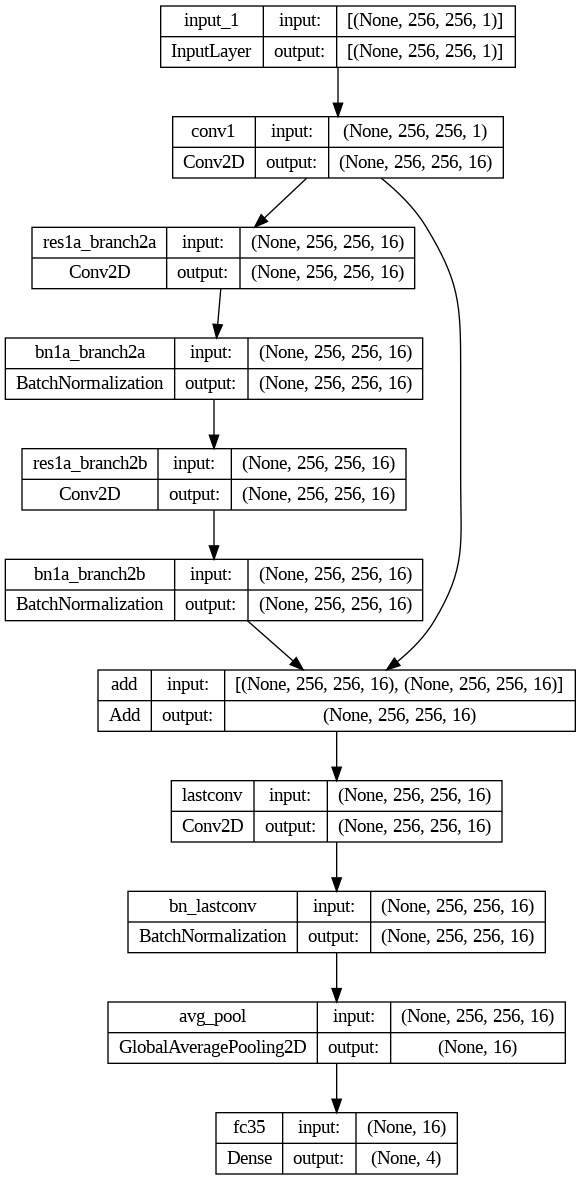

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model ', monitor = 'val_loss',verbose=1,save_best_only=True,mode='auto',save_weights_only=True)
es = EarlyStopping(monitor='val_loss', verbose=1, patience=25)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=20, min_lr=1e-10)
callbacks_list = [checkpoint,es,reduce_lr]

history = model.fit(data_train,target_train,batch_size=32,epochs=20)

Epoch 1/20
435/435 [==============================] - 67s 153ms/step - loss: 0.3405 - acc: 0.8951 - auc: 0.9820 - precision: 0.9160 - recall: 0.8720
Epoch 2/20
435/435 [==============================] - 66s 152ms/step - loss: 0.2359 - acc: 0.9367 - auc: 0.9909 - precision: 0.9476 - recall: 0.9276
Epoch 3/20
435/435 [==============================] - 66s 152ms/step - loss: 0.1970 - acc: 0.9463 - auc: 0.9934 - precision: 0.9548 - recall: 0.9390
Epoch 4/20
435/435 [==============================] - 66s 152ms/step - loss: 0.1671 - acc: 0.9560 - auc: 0.9955 - precision: 0.9615 - recall: 0.9503
Epoch 5/20
435/435 [==============================] - 66s 152ms/step - loss: 0.1350 - acc: 0.9656 - auc: 0.9970 - precision: 0.9714 - recall: 0.9622
Epoch 6/20
435/435 [==============================] - 66s 152ms/step - loss: 0.1260 - acc: 0.9680 - auc: 0.9974 - precision: 0.9724 - recall: 0.9646
Epoch 7/20
435/435 [==============================] - 66s 152ms/step - loss: 0.1279 - acc: 0.9669 - auc: 0

In [ ]:
#checkpoint = ModelCheckpoint('model-{epoch:03d}.model ', monitor = 'val_loss',verbose=1,save_best_only=True,mode='auto',save_weights_only=True)
#es = EarlyStopping(monitor='val_loss', verbose=1, patience=25)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=20, min_lr=1e-10)
#callbacks_list = [checkpoint,es,reduce_lr]

#history = model.fit(data_train,target_train,batch_size=32,epochs=100,callbacks=[callbacks_list],validation_data =(data_val,target_val))

Epoch 1/100
288/288 [==============================] - ETA: 0s - loss: 0.5660 - acc: 0.7702 - auc: 0.9187 - precision: 0.8095 - recall: 0.7203
Epoch 1: val_loss improved from inf to 1.69899, saving model to model-001.model 
288/288 [==============================] - 59s 149ms/step - loss: 0.5660 - acc: 0.7702 - auc: 0.9187 - precision: 0.8095 - recall: 0.7203 - val_loss: 1.6990 - val_acc: 0.1796 - val_auc: 0.5044 - val_precision: 0.1655 - val_recall: 0.1485 - lr: 0.0100
Epoch 2/100
287/288 [============================>.] - ETA: 0s - loss: 0.2220 - acc: 0.9262 - auc: 0.9887 - precision: 0.9339 - recall: 0.9178
Epoch 2: val_loss did not improve from 1.69899
288/288 [==============================] - 43s 150ms/step - loss: 0.2230 - acc: 0.9258 - auc: 0.9885 - precision: 0.9335 - recall: 0.9174 - val_loss: 1.9461 - val_acc: 0.3282 - val_auc: 0.5122 - val_precision: 0.3313 - val_recall: 0.3221 - lr: 0.0100
Epoch 3/100
287/288 [============================>.] - ETA: 0s - loss: 0.1119 - acc:

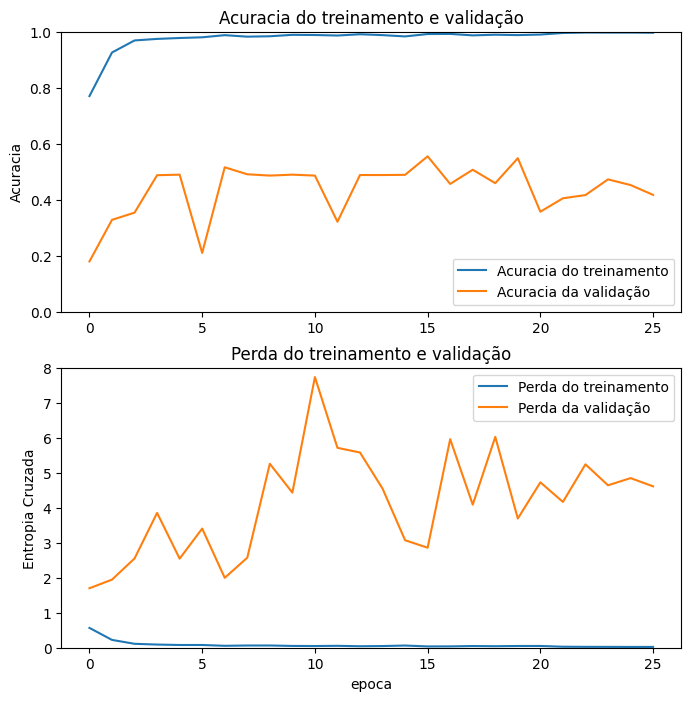

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Acuracia do treinamento')
plt.plot(val_acc, label='Acuracia da validação')
plt.legend(loc='lower right')
plt.ylabel('Acuracia')
plt.ylim([0,1])
plt.title('Acuracia do treinamento e validação')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Perda do treinamento')
plt.plot(val_loss, label='Perda da validação')
plt.legend(loc='upper right')
plt.ylabel('Entropia Cruzada')
plt.ylim([0,8])
plt.title('Perda do treinamento e validação')
plt.xlabel('epoca')
plt.show()

In [ ]:
model.evaluate(data_test,target_test)

83/83 [==============================] - 4s 43ms/step - loss: 7.3604 - acc: 0.2517 - auc: 0.4878 - precision: 0.2517 - recall: 0.2517


[7.360439777374268,
 0.25171104073524475,
 0.4878326952457428,
 0.25171104073524475,
 0.25171104073524475]

83/83 [==============================] - 3s 38ms/step


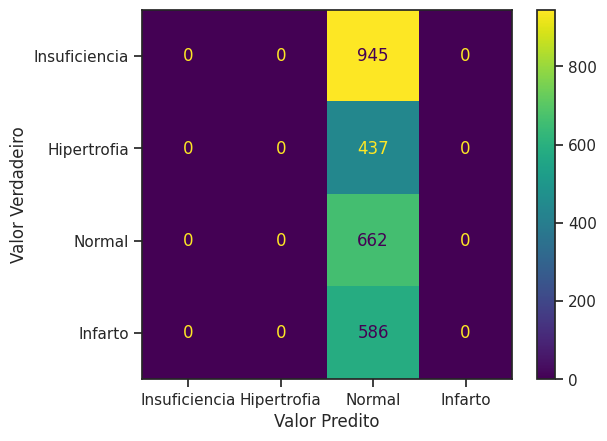

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(data_test)

y_true = [np.argmax(y, axis=None, out=None) for y in target_test]
y_true = np.array(y_true)

y_hat = [np.argmax(y, axis=None, out=None) for y in y_pred]
y_hat = np.array(y_hat)

confusion = confusion_matrix(y_true, y_hat)


ConfusionMatrixDisplay(confusion, display_labels=categorias1).plot()
plt.grid(False)
plt.xlabel("Valor Predito")
plt.ylabel("Valor Verdadeiro")
plt.show()

In [ ]:
print(rotulo_dir1)
print(categorias1)
print(rotulos1)

{'Insuficiencia': 0, 'Hipertrofia': 1, 'Normal': 2, 'Infarto': 3}
['Insuficiencia', 'Hipertrofia', 'Normal', 'Infarto']
[0, 1, 2, 3]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_hat, digits=4))

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       945
           1     0.0000    0.0000    0.0000       437
           2     0.2517    1.0000    0.4022       662
           3     0.0000    0.0000    0.0000       586

    accuracy                         0.2517      2630
   macro avg     0.0629    0.2500    0.1005      2630
weighted avg     0.0634    0.2517    0.1012      2630



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
